# <h1 style='text-align:center;color:green'><b>**E-Commerce Customer Churn Analysis**</b></h1>



### `Business Problem Understanding`


A company in the E-Commerce sector allows buyers and sellers to transact (make sales/purchases) through the website. Purchases on the E-Commerce website can come from various categories of goods/services. Ecom, the company, profits from each transaction made by customers, so customer growth is needed for the company to earn more profit. In recent years, the company has experienced good customer growth, but recent data shows an increase in the number of customers who churn from the E-Commerce website.

To retain profitability growth, the company can employ two strategies. The first is to retain existing customers, and the second is to acquire new customers. According to statistics from various business industries, research findings show that customer acquisition costs are five times higher than customer retention costs.

In conclusion, acquiring new customers is significantly more expensive than retaining existing customers. Therefore, we should focus more on customer retention. The company should devise strategies to predict customers who are likely to churn and provide the necessary treatment to retain them on the E-Commerce platform.

Customer Retention Cost Breakdown:

Staff costs for customer service, customer success, and account management
Marketing expenses focused on customer retention
Customer loyalty programs
It is assumed that the company spends $100,000 annually to maintain 1,000 existing customers.

Thus:

Retention Cost: $100/customer
Meanwhile, the company spends $500,000 to acquire 1,000 new customers.

Thus:

Acquisition Cost: $500/customer

### `Problem Statement`

One of the challenges faced by e-commerce businesses is to retain customers and ensure they continue making transactions. The company is experiencing a decline in customer growth due to customer churn, which results in stagnant or decreasing profits.

### `Goals`

In many business scenarios, retaining customers or detecting customers who are likely to switch to competitors can be more important than attracting new customers. In this case, focusing on recall can help identify customers who might leave our platform or service, allowing for more proactive measures to retain them.

### `Analytic Approach`

Here are the steps of the analysis we will undertake:

Step-1: Conduct Exploratory Data Analysis (EDA) to identify customer behaviors associated with Churn.<br>
Step-2: Build a classification model based on behavioral analysis to predict the likelihood of customers Churning.<br>
Step-3: Identify the factors that contribute to the likelihood of customers Churning.<br>
Step-4: Develop a simulated scheme/strategy to increase the likelihood of customers not Churning.<br>

The analysis results can be accessed by stakeholders through a dedicated platform (Web/Mobile) whenever they need to perform retention activities. The process is as follows:<br>

* Stakeholders input the list of customers targeted for retention.<br>
* The system provides a list of customers who are potential candidates for specific product offers, along with their probability scores.<br>
* The system offers recommendations for effective sales strategies based on the predicted probabilities.<br>
* Stakeholders use the analysis results to perform retention activities.<br>

### `Metric Evaluation`

Target:

0: customer does not churn

1: customer churns

Confusion Matrix Terms:

TP (True Positive): customer actually churns and is predicted to churn<br>
TN (True Negative): customer actually does not churn and is predicted not to churn<br>
FN (False Negative): customer actually churns and is predicted not to churn<br>
FP (False Positive): customer actually does not churn and is predicted to churn<br>

Cost of FN (False Negative):

Disadvantages:

* Loss of a customer (churn) costing $100 per customer<br>
* Cost of customer acquisition to replace the churned customer at $500 per customer<br>

Cost of FP (False Positive):

Advantages:

* As a result of mistakenly treating a customer who does not actually churn but is predicted to churn, the e-commerce platform's reputation may improve (non-churning customers will think the platform is generous in giving out promotions for free)

Disadvantages:

* Miss-targeted treatment for customers who do not churn (but are predicted to churn)
* Waste of customer retention costs, time, and resources

Based on these consequences, what I aim to do is create a model that can optimize the customer retention costs for the company without any customers churning from the e-commerce website. Therefore, I decide to emphasize False Negatives, but also not forget about False Positives, with a greater focus on recall. Hence, the focus metric we use is the F2-Score.

**Reference**:
- https://www.paddle.com/resources/customer-acquisition-vs-retention

---


### `Data Understanding`

Dataset source: [Link](https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves)
* Dataset from the year 2022
* This dataset consists of 3941 rows and 11 columns

**Data Dictionary**

|Features| Description|
|----------|------------|
|Tenure|Tenure of a customer in the company|
|WarehouseToHome|Distance between the warehouse to the customer’s home|
|NumberOfDeviceRegistered| Total number of deceives is registered on a particular customer|
|PreferedOrderCat | Preferred order category of a customer in the last month|
|SatisfactionScore| Satisfactory score of a customer on service|
|MaritalStatus| Marital status of a customer|
|NumberOfAddress|Total number of added on a particular customer|
|Complaint | Any complaint has been raised in the last month|
|DaySinceLastOrder| Day since last order by customer|
|CashbackAmount| Average cashback in last month|
|Churn| Churn flag|

To conduct a proper data analysis, it is essential to comprehend the data types associated with each column. Below is the table illustrating the data types along with their corresponding columns:

| Type       | Category  | Columns                                                                                         |
|------------|-----------|------------------------------------------------------------------------------------------------|
| Numerical  | Discrete  | NumberOfDeviceRegistered, NumberOfAddress|
|            | Continuous| Tenure, WarehouseToHome, DaySinceLastOrder, CashbackAmount|
| Categorical| Nominal   | PreferedOrderCat, Marital_Status,  |
|            | Nominal(Binary) | Complain, Churn| 

In [143]:
# Basic Libraries
import pandas as pd
import numpy as np
import missingno as msno
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Test
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from pycaret.internal.preprocess.transformers import TransformerWrapper
from category_encoders import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer

# Modelling
from pycaret.classification import *
from imblearn.over_sampling import SMOTE
from pycaret.internal.preprocess.transformers import FixImbalancer
from imblearn.under_sampling import NearMiss
from collections import Counter

# Evaluation Metrics
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import dice_ml

# Deployment
from pycaret.classification import load_model

import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [2]:
df=pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


Data Size: Amount & Range

The next step in understanding the data is to look at the amount and range of quantitative and qualitative attributes across all variables and for all items.

In [3]:
display(df.describe().transpose(), df.describe(include='object'))

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


The number of customers who made purchases on the E-commerce platform is 3941, with the following details:

* Marital status: 52% are married
* Favorite product: 37% bought laptops and accessories
* Tenure status: 13% have used the app for 1 month
* Complaint status: 71% of customers did not complain
* Last purchase status: 16% made a purchase within the last 3 days
* Churn status: 83% of customers did not churn

In [4]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns : 
    listItem.append( [col, df[col].isna().sum(), df[col].nunique(), df[col].unique()])

tableDesc = pd.DataFrame(columns = ['Column Name', 'Number of missing value', 'Number of Unique', 'Unique Sample'], 
                         data=listItem)
tableDesc

,Column Name,Number of missing value,Number of Unique,Unique Sample
0,Tenure,194,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,169,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,0,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,0,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,0,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,0,3,"[Single, Married, Divorced]"
6,NumberOfAddress,0,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,0,2,"[0, 1]"
8,DaySinceLastOrder,213,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,0,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


Based on the observations from the table above, it is noted that:

* The columns Tenure, WarehouseToHome, and DaySinceLastOrder contain missing values
* The Tenure column has a data range from 1 to 60, indicating that this data is measured in months, as tenure is often measured in months or years
* The Complain and Churn columns contain only 2 unique values (0 and 1), which suggests these are nominal (binary) data types with 0 indicating 'Customer did not' and 1 indicating 'Customer did'

---

### `Explanatory Data Analysis (EDA)`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [6]:
print(f'The number of rows and columns in this dataset are: {df.shape}')

pd.DataFrame({
    'features': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values*100,
    'null_value': df.isna().sum().values,
    'n_unique': df.nunique().values,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    '0_value': [True if df[col].dtype == int and (df[col] == 0).any() else False for col in df.columns],
    'duplicate' : df.duplicated().sum()})

The number of rows and columns in this dataset are: (3941, 11)


,features,data_type,null_value(%),null_value,n_unique,neg_value,0_value,duplicate
0,Tenure,float64,4.922608,194,36,False,False,671
1,WarehouseToHome,float64,4.288252,169,33,False,False,671
2,NumberOfDeviceRegistered,int64,0.000000,0,6,False,False,671
3,PreferedOrderCat,object,0.000000,0,6,False,False,671
4,SatisfactionScore,int64,0.000000,0,5,False,False,671
5,MaritalStatus,object,0.000000,0,3,False,False,671
6,NumberOfAddress,int64,0.000000,0,14,False,False,671
7,Complain,int64,0.000000,0,2,False,True,671
8,DaySinceLastOrder,float64,5.404720,213,22,False,False,671
9,CashbackAmount,float64,0.000000,0,2335,False,False,671


Let's visualize the missing values in our dataframe using the missingno library.

reference : 

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://github.com/ResidentMario/missingno

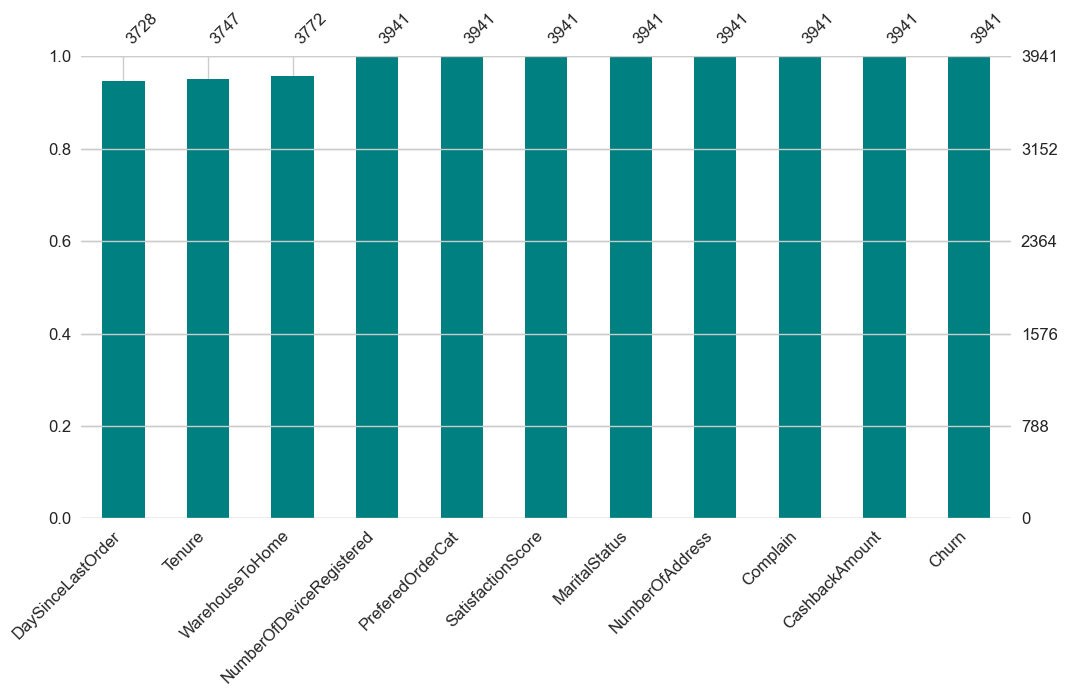

In [7]:
msno.bar(df, sort="ascending", figsize=(12,6), fontsize=12, color='teal');

The bar plot above shows that the variables DaySinceLastOrder, Tenure, and WarehouseToHome have missing values. From the bar plot, we can also see that the number of missing data points is not very high (in the range of 100-200, with the exact numbers available in the table above).

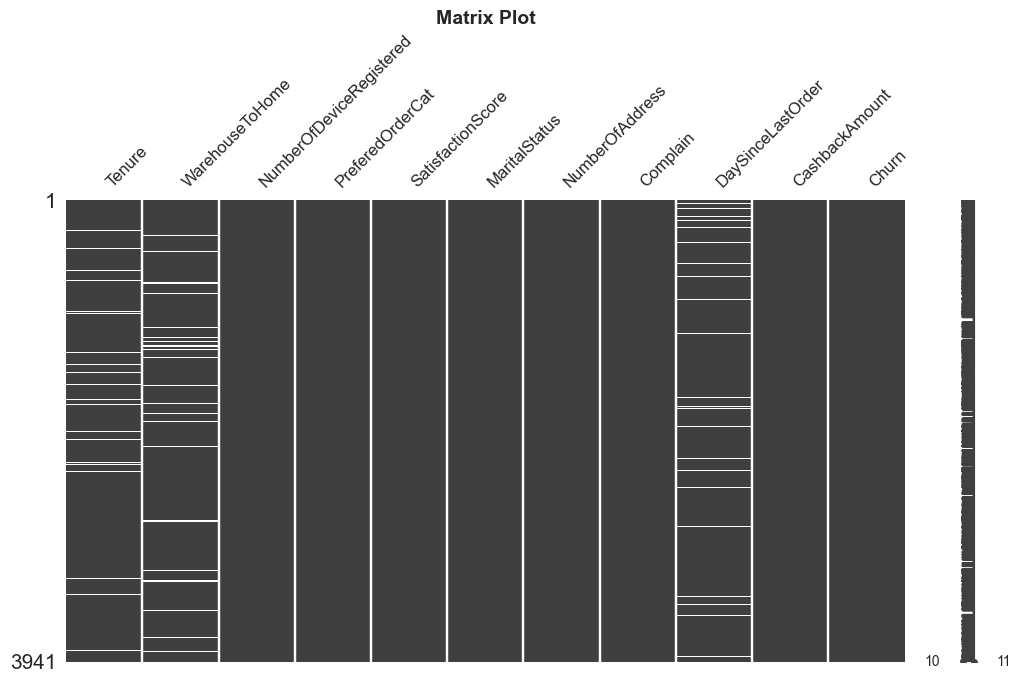

In [8]:
msno.matrix(df, figsize=(12,6), fontsize=12).set_title('Matrix Plot', size=14, weight='bold');

The matrix plot will provide color fill for each column. If there is data, the plot will be shaded in gray. If there are no data (missing values), the plot will be displayed in white. Looking at the matrix plot above, it can be seen that variables with missing values exhibit random patterns (not showing the same pattern across features).

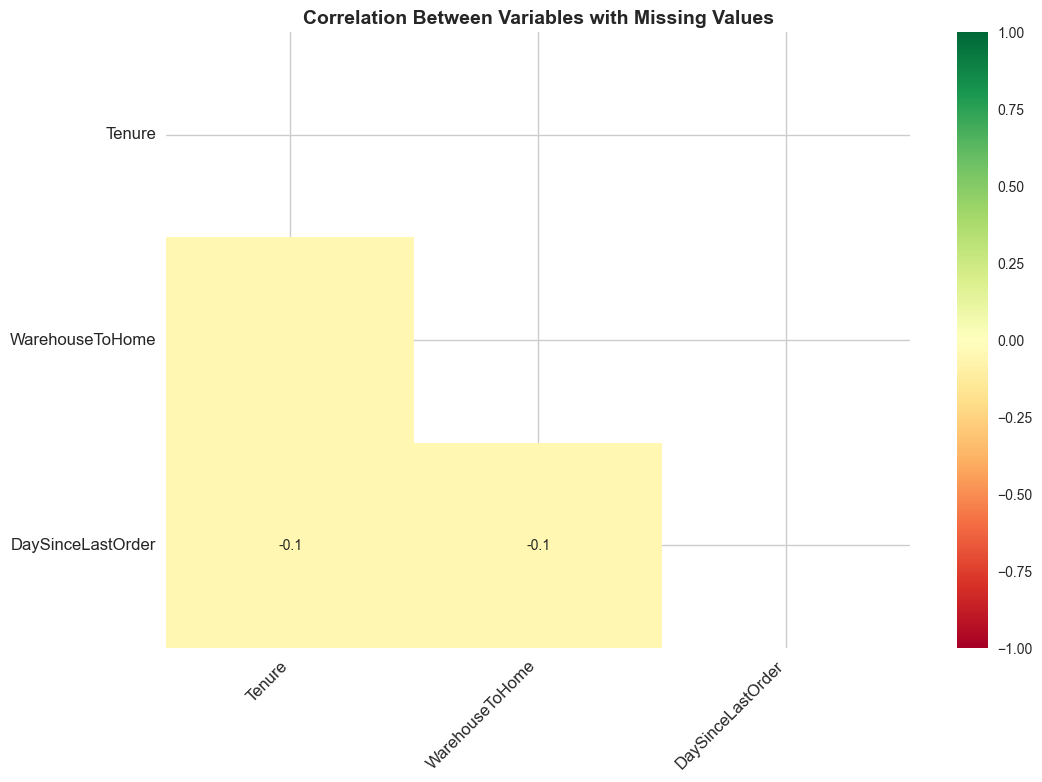

In [9]:
msno.heatmap(df, cmap="RdYlGn", figsize=(12,8), fontsize=12).set_title('Correlation Between Variables with Missing Values', size=14, weight='bold');

The heatmap above indicates that all variables with missing values have a very weak negative correlation (-0.1) or no relationship between missing values within one column compared to another. This means that if there is a missing value in one variable, there is no missing value found in other variables.

Thus, from several visualizations from the missingno library above, it can be concluded that missing values in this dataset are not related to each other. The process of filling missing values will be explained in more detail in the data preprocessing stage.

In [10]:
# Cek data duplikat pada dataset
print(f'Jumlah data duplikat: {df.duplicated().sum()}')

Jumlah data duplikat: 671


#### Distribution Data

,class,n_churned
0,0,3267
1,1,674


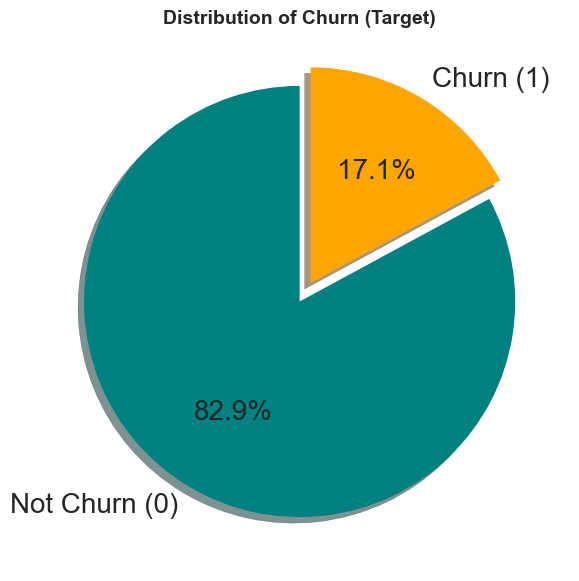

In [11]:
plt.figure(figsize=(7,7))
plt.title('Distribution of Churn (Target)', size=14, weight='bold')
plt.pie(df['Churn'].value_counts(), explode=(0,0.1), labels=['Not Churn (0)', 'Churn (1)'], colors=["teal","orange"], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})

n_churned = pd.DataFrame(df['Churn'].value_counts()).reset_index().rename(columns={'index':'class', 'Churn':'n_churned'})
n_churned

In this dataset, we can observe that 17.1% of customers have churned from this ecommerce service. This figure also indicates that the Churn variable, which serves as the target in modeling, has imbalanced data. This imbalance in the data needs to be addressed so that during modeling, the algorithm does not learn more from the negative class data alone (class 0).

In [12]:
numerical_columns = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
            'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']

,column,skewness,pvalue score
0,Tenure,0.789571,9.014014e-70
1,WarehouseToHome,1.428746,1.067451e-282
2,NumberOfDeviceRegistered,-0.409874,1.067451e-282
3,SatisfactionScore,-0.163771,1.067451e-282
4,NumberOfAddress,1.086842,1.067451e-282
5,Complain,0.967035,1.067451e-282
6,DaySinceLastOrder,1.337376,9.481224e-245
7,CashbackAmount,1.143194,9.481224e-245


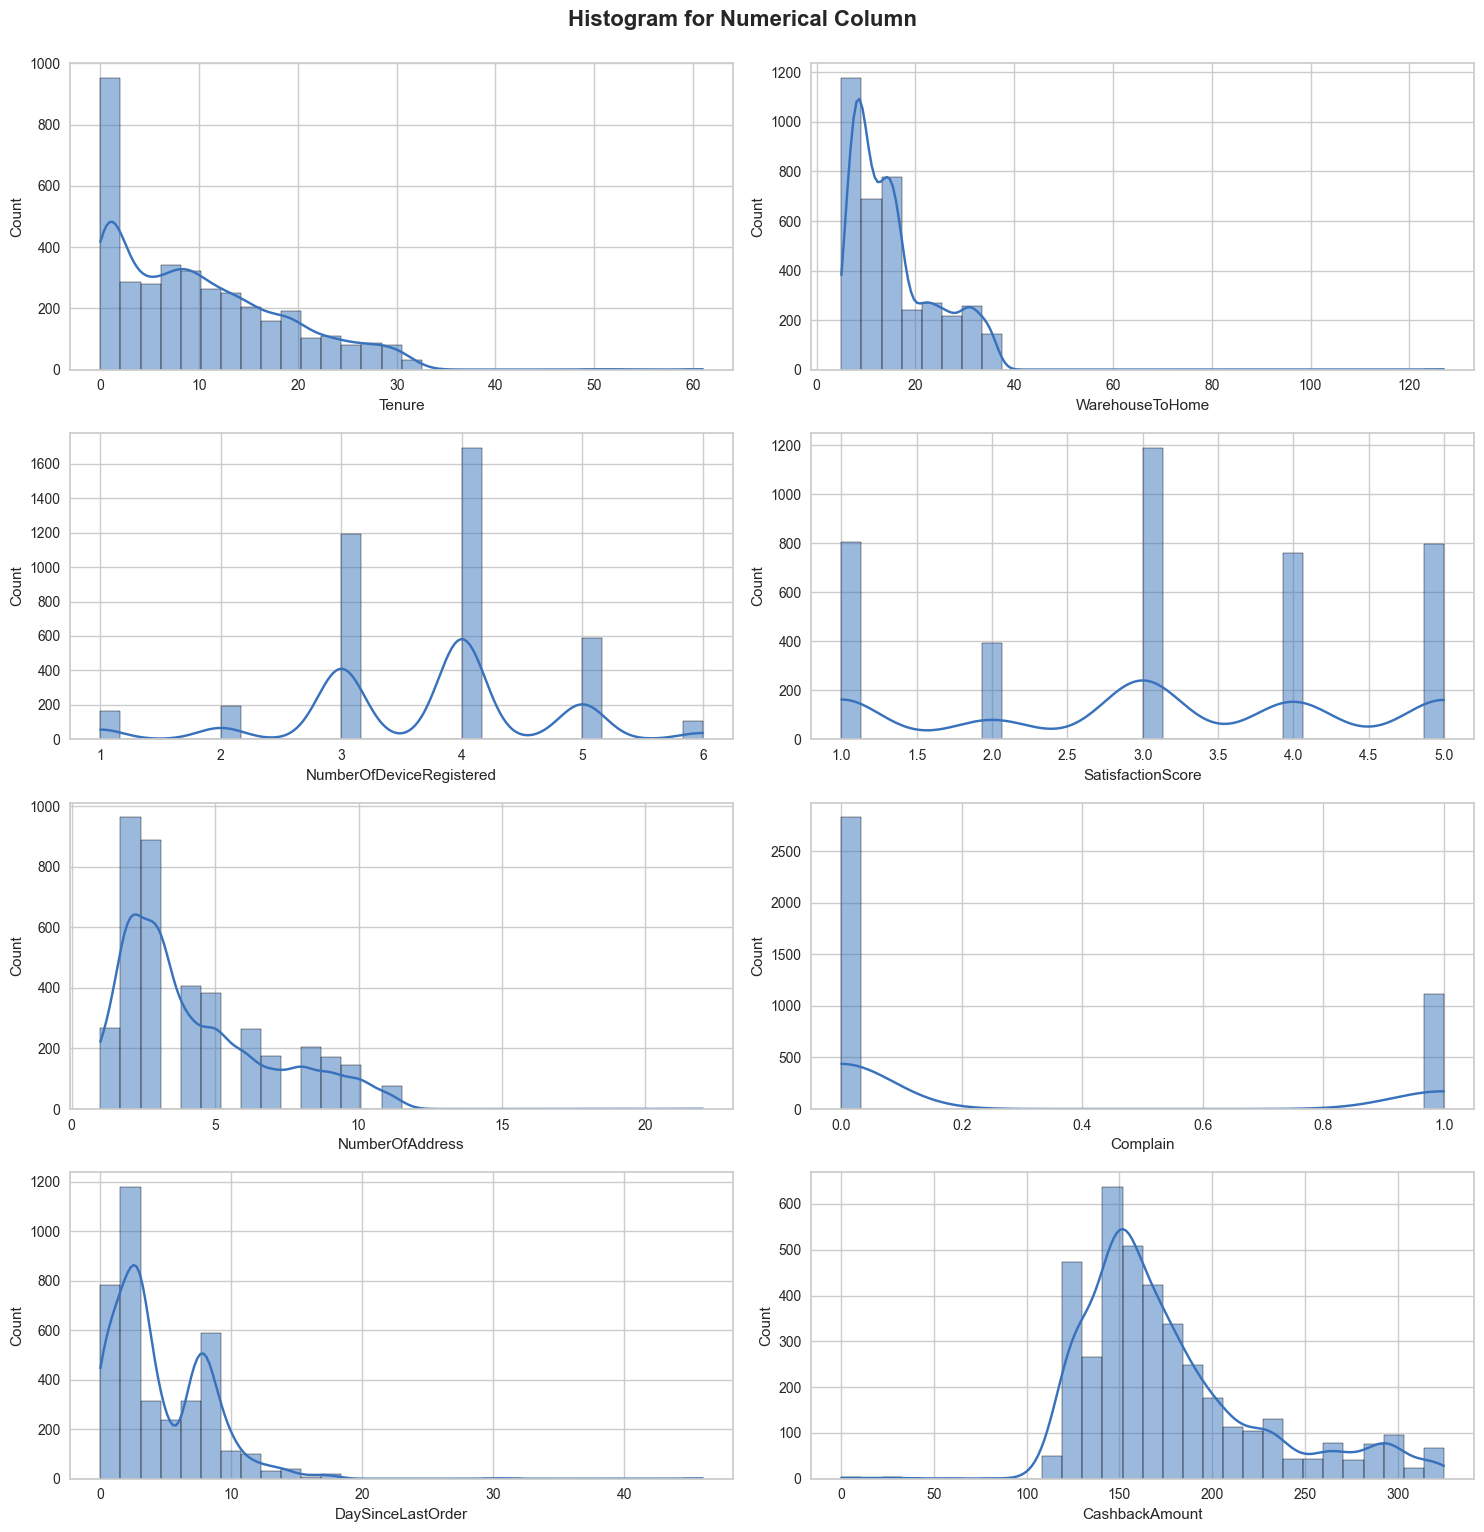

<Figure size 1500x1500 with 0 Axes>

In [13]:
plt.figure(figsize=(15, 15))
n = 4
for i in range(0, len(numerical_columns)):
    plt.subplot(n, math.ceil(len(numerical_columns)/n), i+1)
    sns.histplot(df[numerical_columns[i]], color='#3972bc', bins=30, kde=True)
    plt.tight_layout()

plt.suptitle('Histogram for Numerical Column', fontsize=16, y=1.02, fontweight='bold')
plt.show

plt.figure(figsize=(15, 15))

list_pvalue_cont = []
skew_cont = []

for cont in numerical_columns:
    if df[cont].isna().any() == True:
        s, pval = normaltest(df[cont].dropna())
        list_pvalue_cont.append(pval)
    else:
        s, pvalue = normaltest(df[cont].dropna())
        list_pvalue_cont.append(pval)
    skew_cont.append(df[cont].skew())

pvalue_cont = pd.DataFrame({'column': numerical_columns, 'skewness': skew_cont, 'pvalue score': list_pvalue_cont})
pvalue_cont

Based on the visualization and normality test above, it is known that for numerical variable (continuous) data in the dataset, it is not normally distributed and has a right-skewed shape (because the skewness value > 0). The insights obtained are as follows:

* In the `Tenure` variable, it can be seen that many customers spend less than two months using this e-commerce platform. Meanwhile, for over two months, the time spent by customers tends to be fluctuating but decreasing.
* In the `WarehouseToHome` variable, it depicts the distance between the e-commerce shipping warehouse and the customer's home. The range of distances from the closest, which is 5 km, to the farthest, up to 127 km.
* `NumberOfDeviceRegistered`, when accessing the e-commerce application, most customers register 4 devices when making transactions.
* `SatisfactionScore` indicates that most customers give a score of 3 (neutral) for satisfaction with the e-commerce service, but in the second position, customers are very dissatisfied (score 1) with this e-commerce service.
* `NumberOfAddress`, when using the e-commerce application, most customers register 2 addresses for use in delivering purchased products.
Complain shows that many customers do not file complaints (class 0) compared to those who file complaints.
* `DaySinceLastOrder` indicates the number of days from the last time the customer made a transaction until the time this data was collected. On average, customers go without shopping for up to 4 days before making another purchase.
* `CashbackAmount` describes the average cashback received by customers based on last month's transactions. Here, it is shown that most customers receive cashback in the range of around $150 based on last month's transactions.

In [14]:
categorical_viz = ['PreferedOrderCat','MaritalStatus']

In [15]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

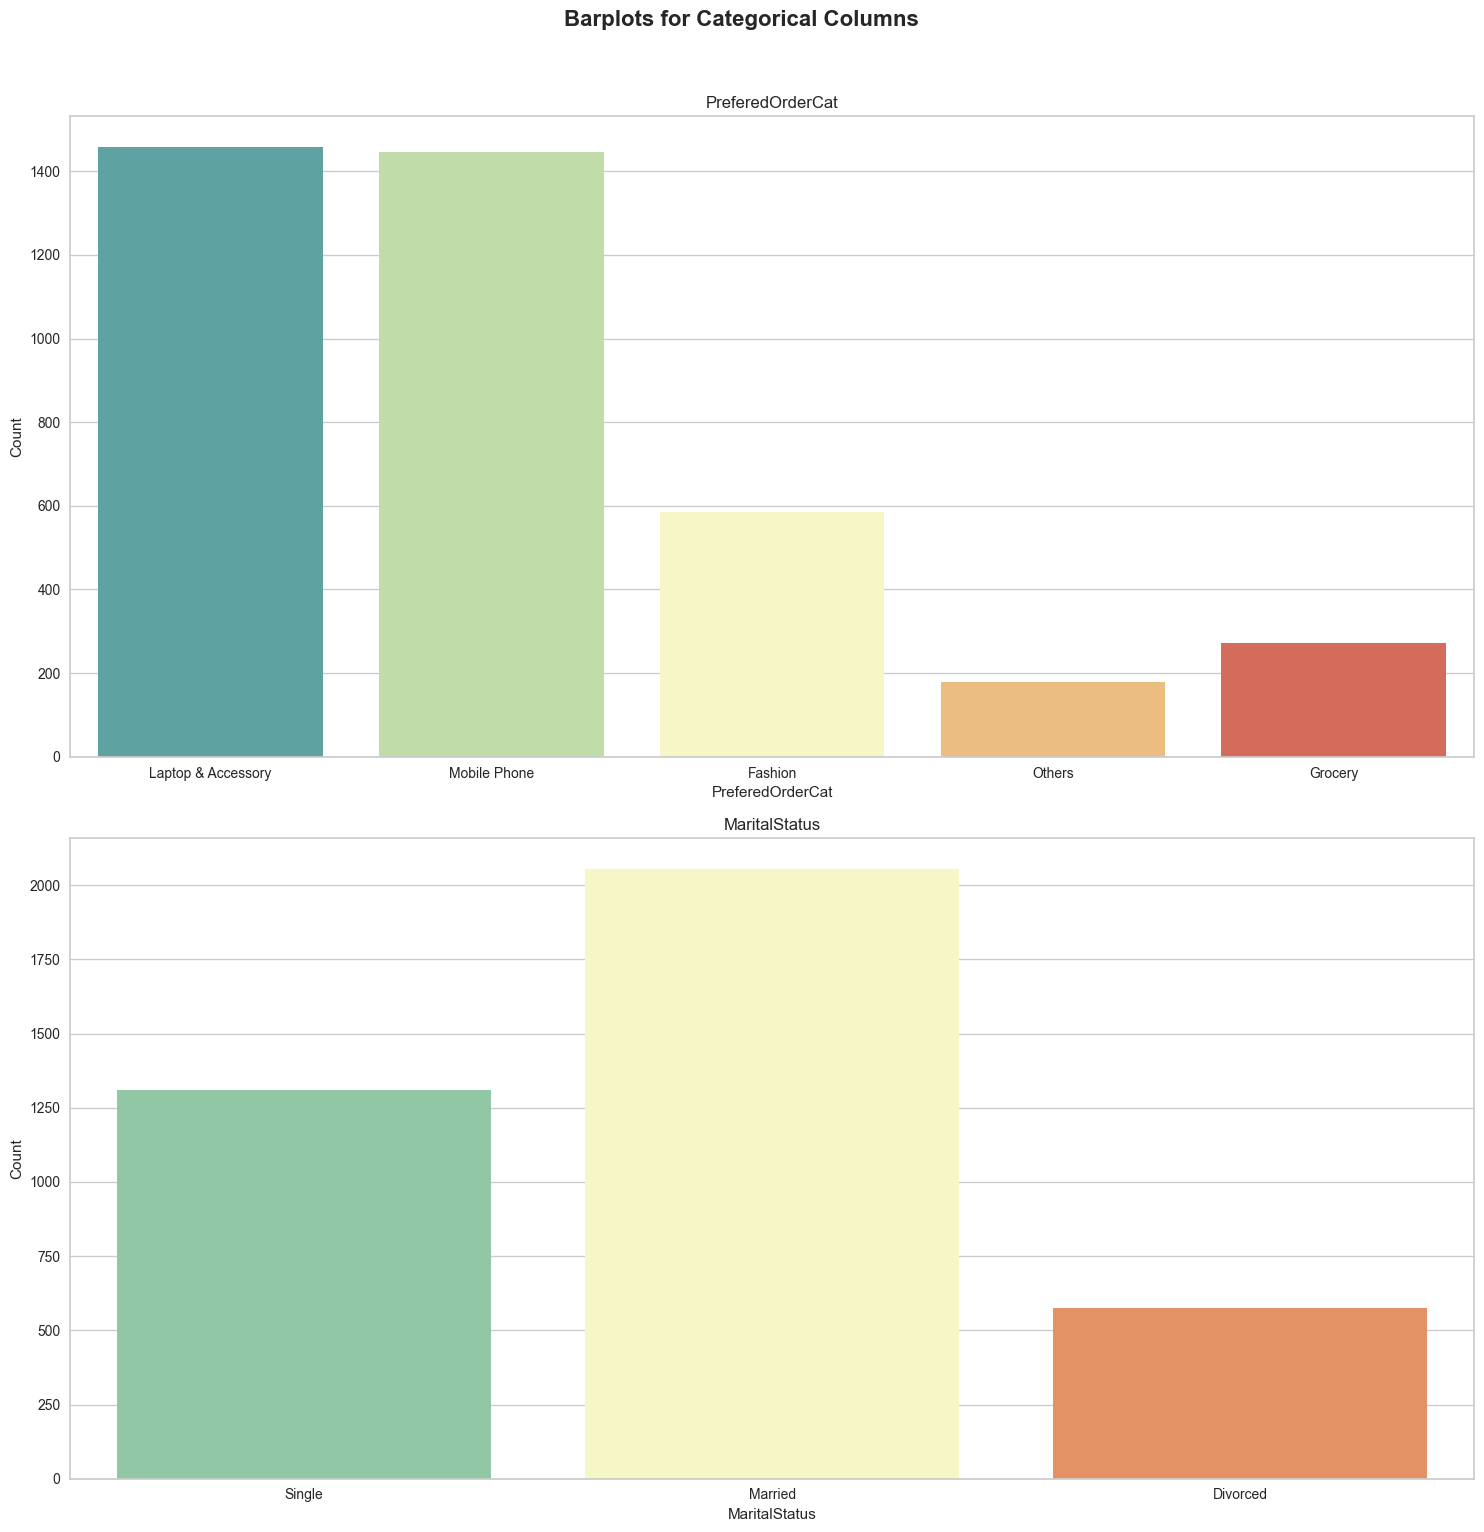

In [16]:
cat_cols = categorical_viz.copy()


plt.figure(figsize=(15, 15))
n = 2
for i, column in enumerate(cat_cols):
    plt.subplot(n, math.ceil(len(cat_cols)/n), i+1)
    bar_plot=sns.countplot(x=column, data=df, palette='Spectral_r')
    plt.title(column)
    plt.ylabel('Count')

plt.suptitle('Barplots for Categorical Columns', fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

After combining similar values, here are the insights from the visualization of categorical variables:

* Based on `PreferedOrderCatcustomer`, customers tend to purchase Mobile Phones more frequently, followed by purchases of Laptops & Accessories.
* In terms of `MaritalStatus`, there are more customers who are married compared to those who are single or divorced.

#### Data Correlation

##### Numerical Feature vs Target
Untuk dapat memahami korelasi antara feature numerical dengan target, maka dilakukanlah uji korelasi antar feature. Karena semua feature numerical tidak terdistribusi normal, maka uji korelasi akan menggunakan uji korelasi 'spearman'. Rentang hasil uji korelasi adalah dari -1 sampai dengan 1.

Kekuatan korelasi:
- 0 - 0.2: sangat lemah
- 0.2 - 0.4: lemah
- 0.4 - 0.6: moderate
- 0.6 - 0.8: kuat
- 0.8 - 1.0: sangat kuat

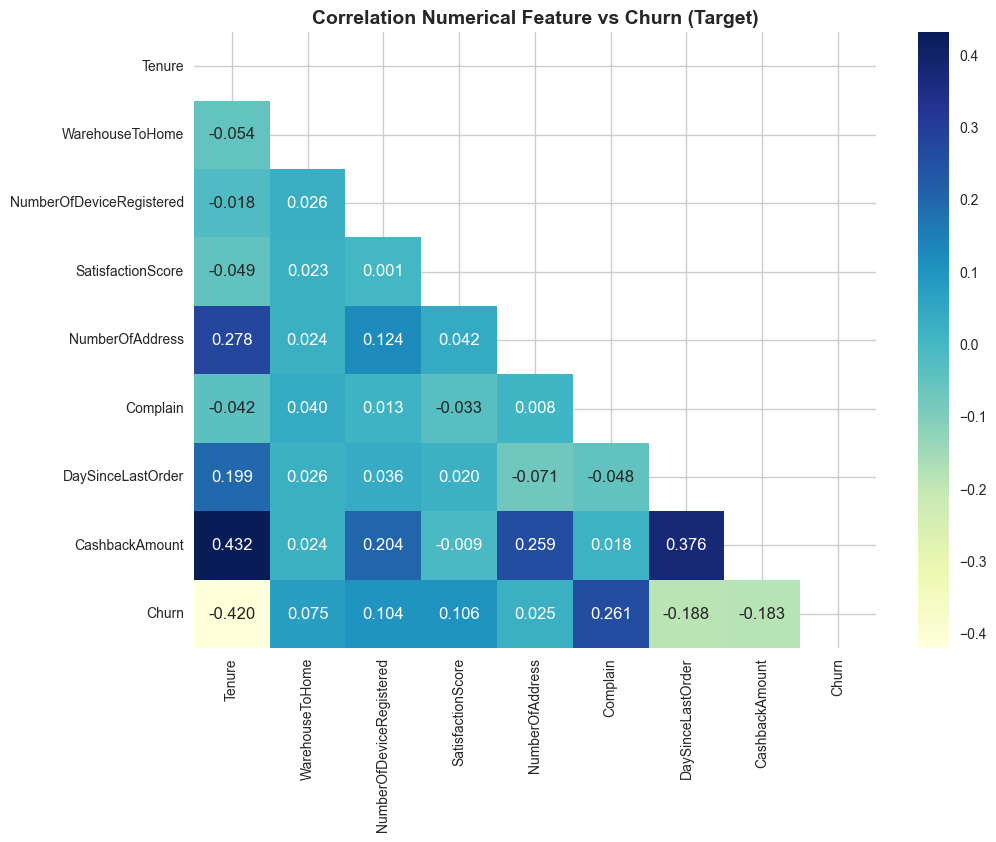

In [17]:
corr = df.select_dtypes(include='number').corr('spearman')
plt.figure(figsize=(11,8))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.3f', mask=matrix, cmap='YlGnBu')
plt.title('Correlation Numerical Feature vs Churn (Target)', size=14, weight='bold');

The feature `Tenure` has the strongest negative correlation with a score of **-0.420**, indicating a moderate level of association. This suggests that as the tenure of a customer decreases, the likelihood of churn increases.

##### Categorical Feature vs Target

To assess the relationship between categorical features and the target variable, we will use the chi-square test. The hypotheses are as follows:
- Ho: The categorical feature and the target variable `Churn` are independent.
- Ha: The categorical feature and the target variable `Churn` are dependent.

In [18]:
cat_cols = list(df.describe(include='O').columns)
chi2_result = []

for i in cat_cols:
  df_chi = pd.crosstab(df[i], df['Churn'])
  stat, pvalue, dof, expected = chi2_contingency(df_chi)
  chi2_result.append(round(pvalue, 5))

df_chi_result = pd.DataFrame({'categorical_features': cat_cols,'chi2_score': chi2_result})
df_chi_result['notes'] = np.where(df_chi_result['chi2_score'] > 0.05, 'independent', 'dependent')
df_chi_result

,categorical_features,chi2_score,notes
0,PreferedOrderCat,0.0,dependent
1,MaritalStatus,0.0,dependent


Based on the chi-square test results above, it is known that all categorical features have a chi-square score < 0.05 (rejecting Ho). This means that each categorical feature is associated with the target variable `Churn`.

#### Data Analysis

After visualizing the data distribution and correlation among variables, the next step is to conduct data analysis. Before proceeding with the analysis, I have the following assumptions regarding customer churn analysis:
- Do customers who stop using the ecommerce subscription tend to stop early in their service usage?
- Are customers who file complaints more likely to stop using the ecommerce service? 
- Does low satisfaction indicate a high churn rate?
- Do customers who leave the ecommerce service no longer make purchases in the last week?
- How does the purchase behavior of churned customers look like? Does it correlate with the cashback they receive?
- Do married customers tend to churn more from the ecommerce service compared to others?

1. Does the customer who stops using the ecommerce subscription terminate their usage of the service at the beginning of the month?

Churn,0,1,Total,Churn %
Tenure,,,,
0.0,152.0,195.0,347.0,56.2
1.0,237.0,252.0,489.0,51.5
2.0,107.0,10.0,117.0,8.5
3.0,123.0,13.0,136.0,9.6
4.0,138.0,13.0,151.0,8.6


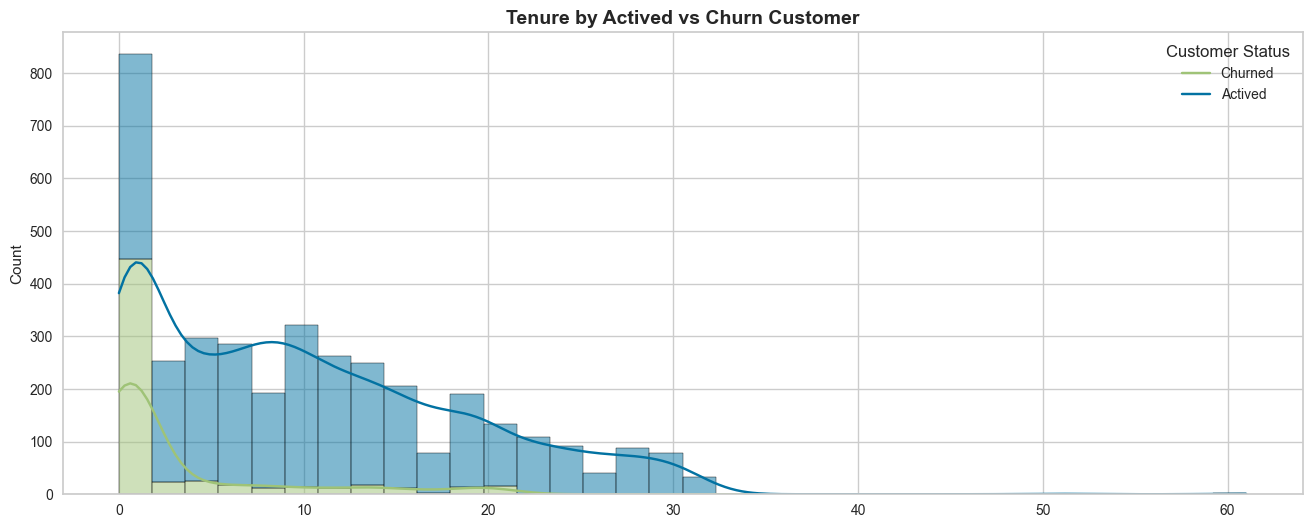

In [19]:
# Function untuk crosstab table
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab

plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x='Tenure', hue='Churn',kde=True, multiple='stack')
ax.set_title('Tenure by Actived vs Churn Customer', size=14, weight='bold')
ax.set_xlabel(None);
plt.legend(title='Customer Status', labels=['Churned', 'Actived'])

crosstab_viz('Churn', 'Tenure').T.head(5)

`Tenure` correlates most negatively with `Churn`, from the histogram visualization above, we can observe that the usage of the ecommerce service increases within the first 2 months. This can be assumed because customers are initially attracted to the service offered by the ecommerce platform. However, when we look at it based on `Churn`, the assumption at the beginning is indeed correct, as the number of customers who stop using the ecommerce service within the first 2 months is higher than in other periods. Looking at the table, the percentage of customers who stop using the ecommerce service is more than 50% of the total users within those first 2 months. Customer churn in the early period like this can be referred to as early-life churn. Based on [domain knowledge](https://www.cartesian.com/monitoring-and-mitigating-early-life-churn/), during the initial period of using a service, customers often discontinue the service due to various reasons such as:

- Unsatisfactory customer support (sometimes failing to resolve issues),
- Product availability in the ecommerce platform,
- Quality of ecommerce service (e.g., payment process, shipping process), and others.

However, to increase customer `Tenure` in using this e-commerce application, the company can consider implementing gamification in ecommerce (e.g., point system, leveling system, etc.).

2. Does the customer who file complaints tend to stop using e-commerce services?

Complain,0,1
Churn,,
0,2519.0,748.0
1,309.0,365.0
Total,2828.0,1113.0
Churn %,10.9,32.8


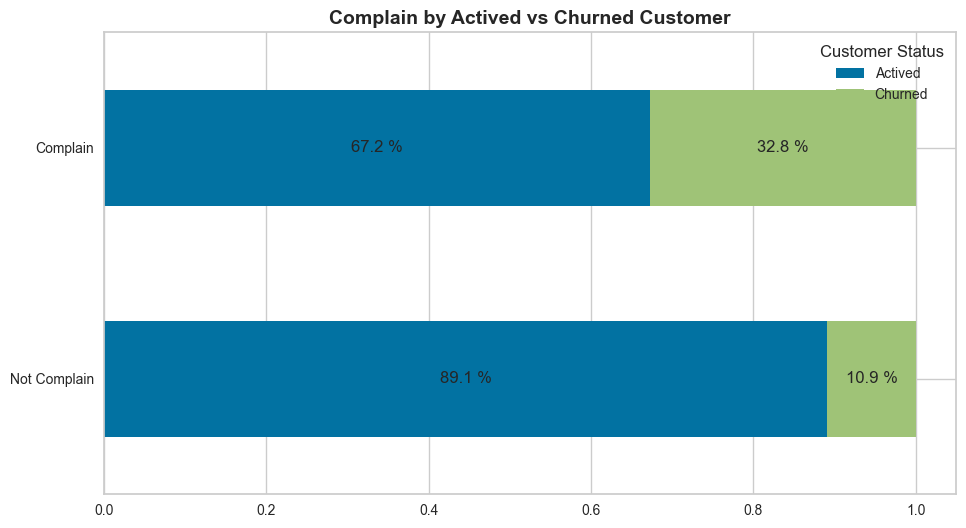

In [20]:
plt.figure(figsize=(11,6))
ax = plt.subplot(111)
complain_churn = df.groupby('Complain')['Churn'].value_counts(normalize=True).unstack('Churn')
complain_churn.plot.barh(stacked=True, ax = ax)
plt.title('Complain by Actived vs Churned Customer', size=14, weight='bold')
plt.yticks(ticks=[0, 1], labels=['Not Complain', 'Complain'], rotation=0)
plt.ylabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')

for ix, row in complain_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix, 
                    f"{int(round(element,3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'Complain')

Then, for the `Complain` feature that shows the strongest positive correlation with `Churn`, it indicates that based on customer complaints, the proportion of customers who complain is higher for those who stop using e-commerce services by 32.8% (3 times higher, proportionally) compared to those who do not complain. This is consistent with the initial assumption where customers who complain tend to have a higher churn rate from e-commerce. It is known that customers who file complaints often experience dissatisfaction with the services provided, so it is highly possible for them to switch to competitors. Therefore, the company needs to review its current customer support procedures and improve customer support services to minimize churn (e.g., creating FAQs related to the purchase and shipping process, implementing chatbots, establishing a clear escalation process for customer issues).

In [21]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


3. Will low satisfaction scores indicate a high churn rate?

SatisfactionScore,1,2,3,4,5
Churn,,,,,
0,712.0,341.0,979.0,637.0,598.0
1,93.0,51.0,211.0,121.0,198.0
Total,805.0,392.0,1190.0,758.0,796.0
Churn %,11.6,13.0,17.7,16.0,24.9


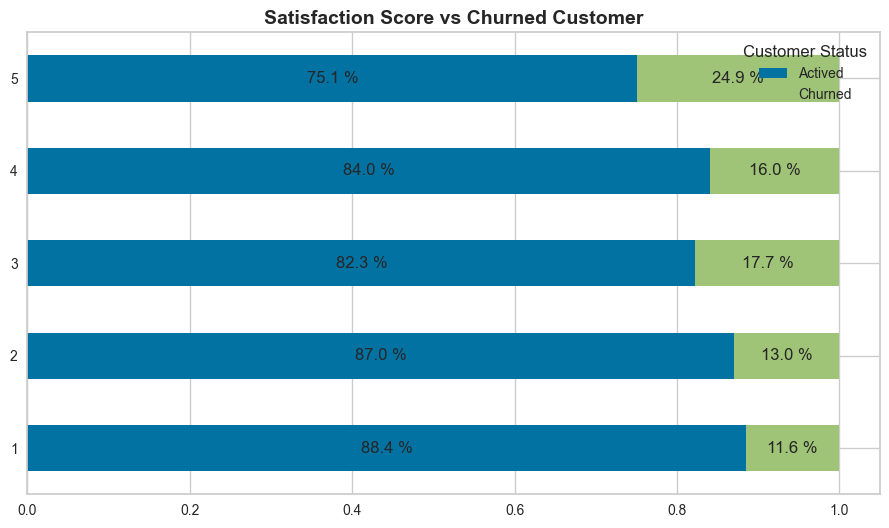

In [22]:
plt.figure(figsize=(11,6))
ax = plt.subplot(111)
complain_churn = df.groupby('SatisfactionScore')['Churn'].value_counts(normalize=True).unstack('Churn')
complain_churn.plot.barh(stacked=True, ax = ax)
plt.title('Satisfaction Score vs Churned Customer', size=14, weight='bold')
plt.ylabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')

for ix, row in complain_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix, 
                    f"{int(round(element,3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'SatisfactionScore')

Based on customer satisfaction scores, it turns out that customers who rate 5 are the ones who most frequently stop using the ecommerce service. Conversely, customers who rate 1 have fewer churns. This contradicts the initial assumption that customers who rate 1 would indicate a higher churn rate than those who rate above 1. However, this is similar to real-world cases where customers who rate satisfaction as 1 might still use the ecommerce platform, while those who rate it as 5 might actually leave the ecommerce service. To prevent customers who give high satisfaction scores from eventually leaving the e-commerce application, the company can delve deeper into user assessments of the application (customer reviews) and consider using NPS (Net Promoter Score) as a customer satisfaction measurement tool.

4. Have customers who have left the e-commerce service not placed any orders in the last week?

DaySinceLastOrder,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,30.0,31.0,46.0
Churn,,,,,,,,,,,,,,,,,,,,,,
0,222.0,310.0,461.0,541.0,272.0,132.0,69.0,269.0,334.0,187.0,104.0,54.0,41.0,33.0,24.0,12.0,8.0,12.0,7.0,1.0,1.0,0.0
1,123.0,128.0,85.0,91.0,40.0,23.0,12.0,45.0,48.0,21.0,7.0,4.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Total,345.0,438.0,546.0,632.0,312.0,155.0,81.0,314.0,382.0,208.0,111.0,58.0,42.0,33.0,28.0,13.0,8.0,12.0,7.0,1.0,1.0,1.0
Churn %,35.7,29.2,15.6,14.4,12.8,14.8,14.8,14.3,12.6,10.1,6.3,6.9,2.4,0.0,14.3,7.7,0.0,0.0,0.0,0.0,0.0,100.0


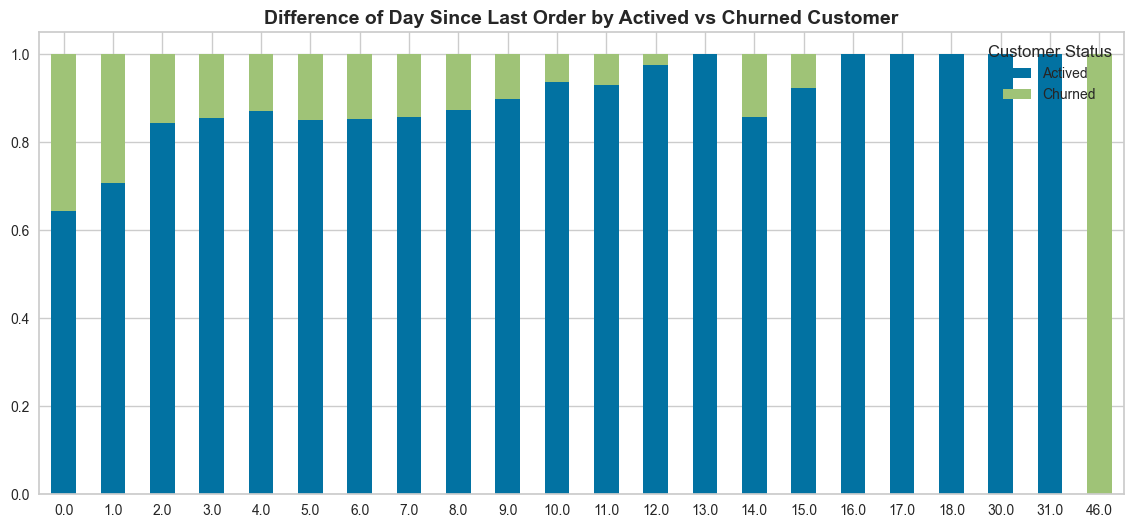

In [23]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
order_churn = df.groupby('DaySinceLastOrder')['Churn'].value_counts(normalize=True).unstack('Churn')
order_churn.plot.bar(stacked=True, ax = ax)
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')
plt.title('Difference of Day Since Last Order by Actived vs Churned Customer', size=14, weight='bold');

pd.set_option('display.max_columns', None)
crosstab_viz('Churn', 'DaySinceLastOrder')

Next, regarding the transaction period, when looking at the `DaySinceLastOrder` feature, it can be observed that customers who have left the e-commerce service still engage in shopping activities up to the 7th day until the last day this data was retrieved. This is supported by the proportion of churned customers who still shop on `DaySinceLastOrder` 0 and 1. There are only a few churned customers whose `DaySinceLastOrder` falls within the range of > 10 days. This means that even though customers continue to shop regularly, they still decide to leave the e-commerce service. This contradicts the initial assumption that churned customers continue to transact during the last week, suggesting that `DaySinceLastOrder` is not the cause of customer churn.

5. How does purchasing products from churned customers work? Does it have an impact on the cashback received?

PreferedOrderCat,Fashion,Grocery,Laptop & Accessory,Mobile Phone,Others
Churn,,,,,
0,491.0,261.0,1316.0,1032.0,167.0
1,94.0,12.0,142.0,414.0,12.0
Total,585.0,273.0,1458.0,1446.0,179.0
Churn %,16.1,4.4,9.7,28.6,6.7


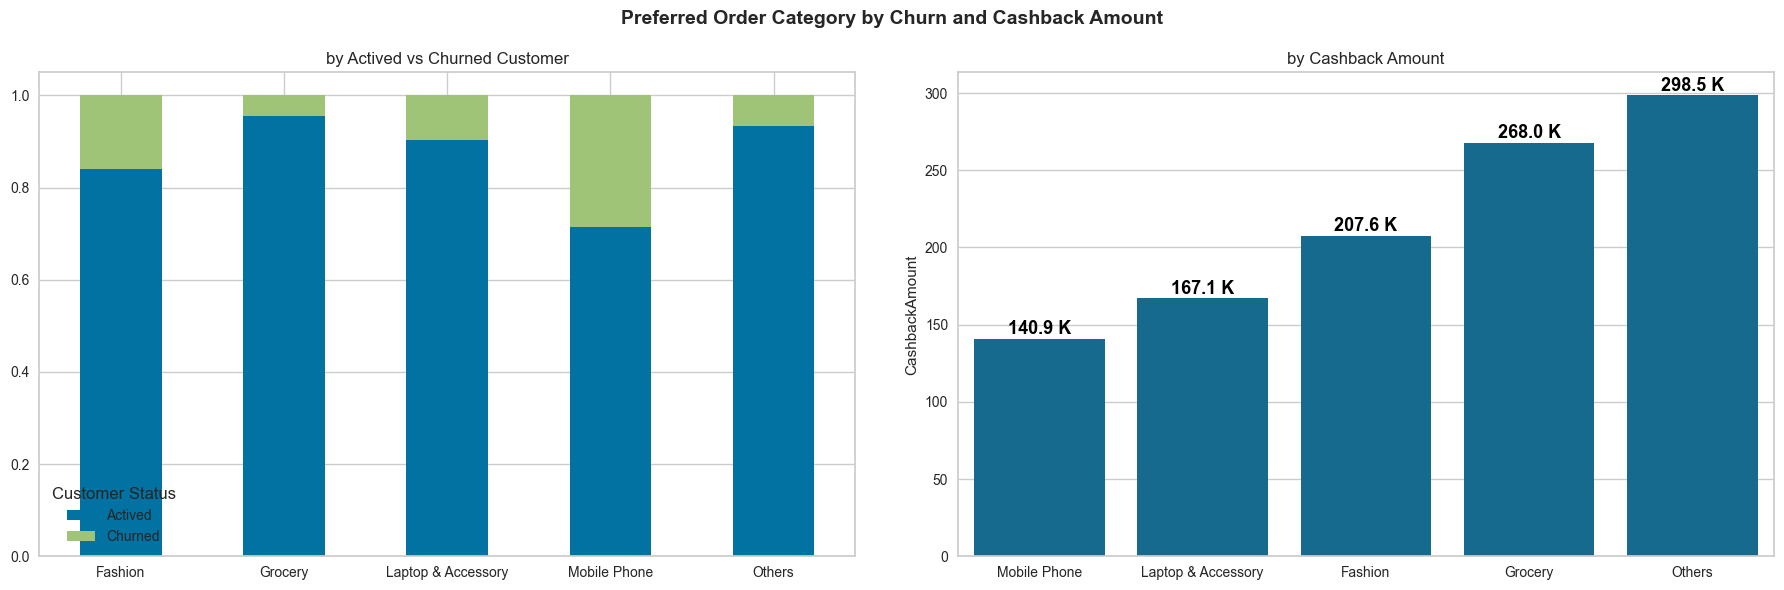

In [24]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Preferred Order Category by Churn and Cashback Amount', size=14, weight='bold')

ax = plt.subplot(1,2,1)
df.groupby('PreferedOrderCat')['Churn'].value_counts(normalize=True).unstack('Churn').plot.bar(stacked=True, ax=ax).set_title('by Actived vs Churned Customer')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='lower left')

ax = plt.subplot(1,2,2)
lb = sns.barplot(data=df, x='PreferedOrderCat', y='CashbackAmount', estimator=np.median, ci=0, ax=ax, order=df.groupby('PreferedOrderCat')['CashbackAmount'].median().sort_values().index)
for p in lb.patches:
    lb.annotate(f'{round(p.get_height(), 1)} K', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13, weight='bold')
plt.title('by Cashback Amount')
plt.xlabel(None)
plt.tight_layout(w_pad=3)

crosstab_viz('Churn', 'PreferedOrderCat')

Then, based on the `PreferedOrderCat`, it shows that 28.6% of customers who purchase mobile phones the most tend to exit the ecommerce service compared to customers who shop in other categories. Upon further examination based on the cashback received, customers who purchase mobile phones also receive the lowest cashback compared to other product categories. Meanwhile, customers who purchase laptops and accessories (other tertiary products) show fewer churned customers but receive higher cashback, 26.2k more than the cashback for purchasing mobile phones. Therefore, it can be assumed that buyers of mobile phones do not receive more cashback when making transactions, thus customers consider it less profitable to buy these products. Hence, it may be considered to provide larger cashback specifically for mobile phone buyers and conduct A/B testing related to cashback provision that will be beneficial for both customers and the company.

6. Apakah customer yang sudah menikah yang lebih banyak berhenti dari layanan ecommerce? maritalstatus

MaritalStatus,Divorced,Married,Single
Churn,,,
0,487.0,1825.0,955.0
1,89.0,230.0,355.0
Total,576.0,2055.0,1310.0
Churn %,15.5,11.2,27.1


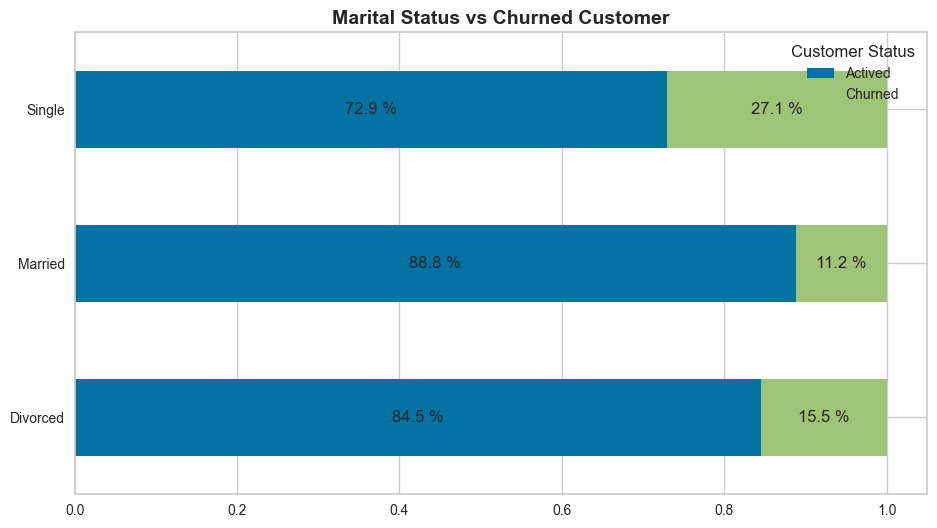

In [25]:
plt.figure(figsize=(11,6))
ax = plt.subplot(111)
complain_churn = df.groupby('MaritalStatus')['Churn'].value_counts(normalize=True).unstack('Churn')
complain_churn.plot.barh(stacked=True, ax = ax)
plt.title('Marital Status vs Churned Customer', size=14, weight='bold')
plt.ylabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')

for ix, row in complain_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix, 
                    f"{int(round(element,3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'MaritalStatus')

Demographic data typically serves as one of the crucial factors for market segmentation to provide relevant information to entice customers to shop. If we look at the demographic data (`MaritalStatus`), it indicates that 27.1% of single customers are the ones who mostly discontinue using the ecommerce service compared to those who are married or divorced. This contradicts the initial assumption where previously, based on the data distribution, there were more married customers than single or divorced ones in the dataset. This could be possible if single customers are still in their productive age (for example, 20-35 years old, with no age feature in the dataset), hence single customers are still experimenting with this ecommerce service. Additionally, productive-aged customers are usually more tech-savvy than older customers, making it easier for them to try out existing ecommerce services. Therefore, if dissatisfied, single customers would be more prone to switching to a competitor's ecommerce platform. Hence, it is recommended that the company creates more segmented marketing campaigns, especially for customers with high churn characteristics.

### `Data Preparation`

#### Data Cleaning

In [26]:
# Drop data duplicates
df = df.drop_duplicates()

# Menampilkan jumlah baris dan kolom setelah drop duplicates
print(f'Jumlah baris dataset: {df.shape[0]}\nJumlah kolom dataset: {df.shape[1]}')

Jumlah baris dataset: 3269
Jumlah kolom dataset: 11


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3110 non-null   float64
 1   WarehouseToHome           3134 non-null   float64
 2   NumberOfDeviceRegistered  3269 non-null   int64  
 3   PreferedOrderCat          3269 non-null   object 
 4   SatisfactionScore         3269 non-null   int64  
 5   MaritalStatus             3269 non-null   object 
 6   NumberOfAddress           3269 non-null   int64  
 7   Complain                  3269 non-null   int64  
 8   DaySinceLastOrder         3088 non-null   float64
 9   CashbackAmount            3269 non-null   float64
 10  Churn                     3269 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.5+ KB


In [28]:
numerical_col = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
            'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
            'Churn']

<function matplotlib.pyplot.show(close=None, block=None)>

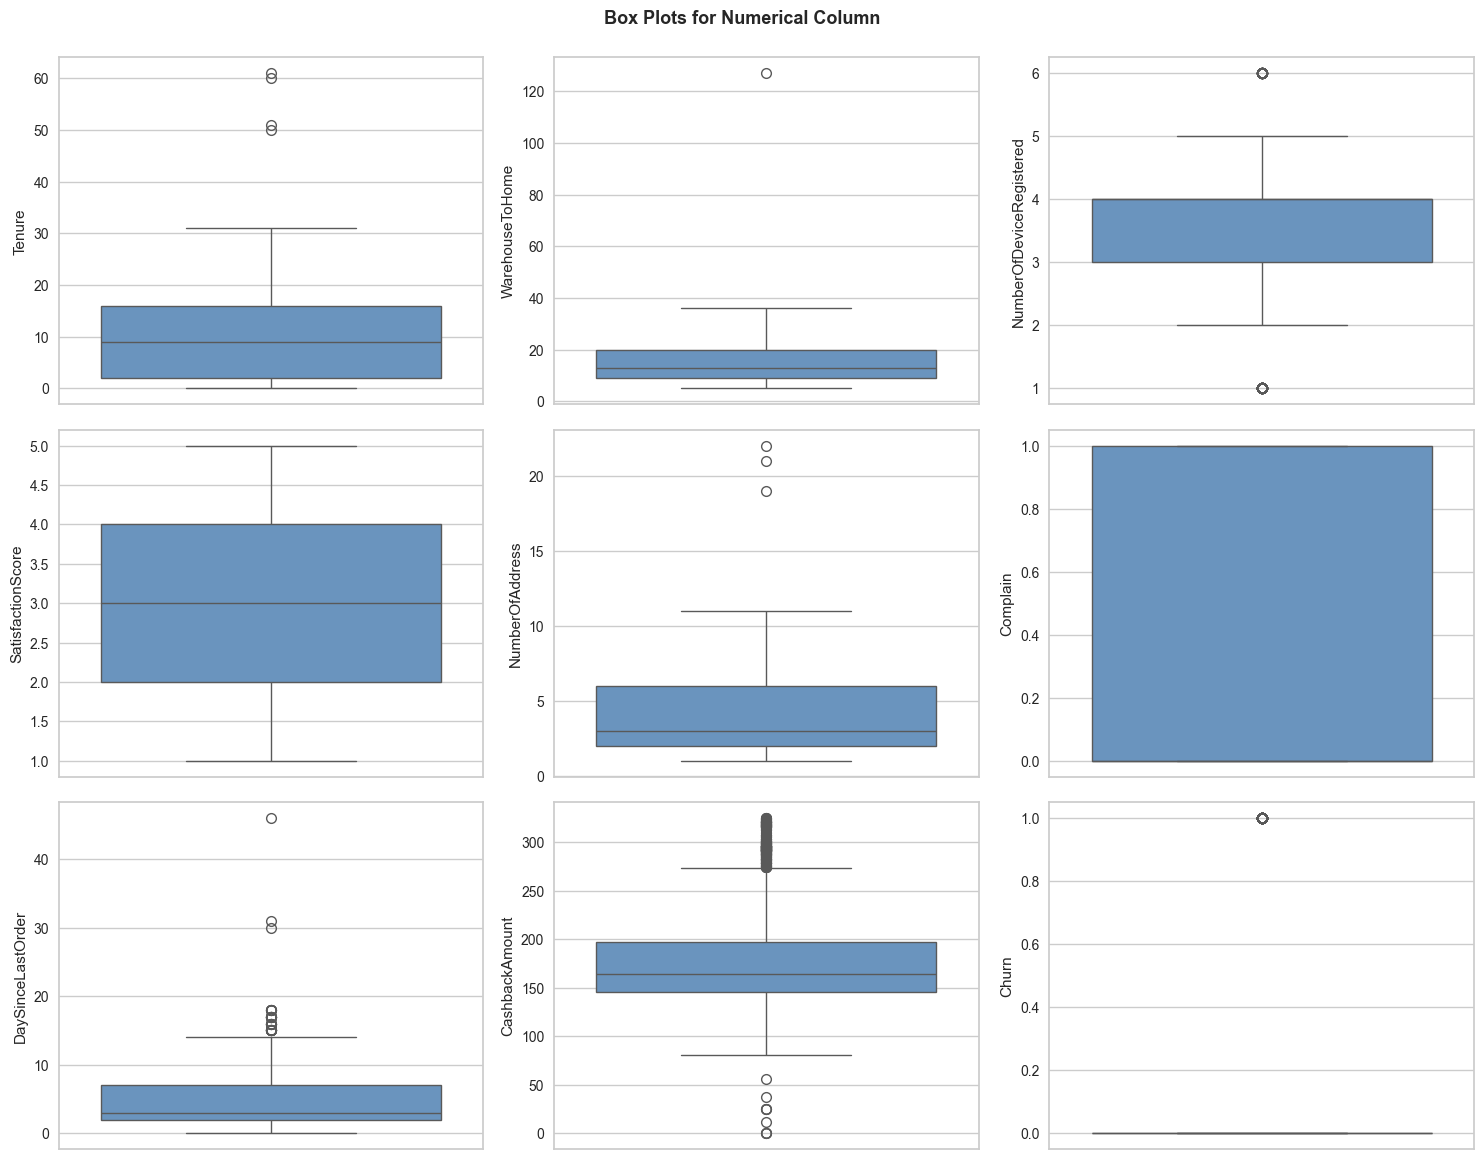

In [29]:
#Check Outliers
plt.figure(figsize=(15, 15))
n = 4
for i in range(0, len(numerical_col)):
    plt.subplot(n, math.ceil(len(numerical_col)/n), i+1)
    sns.boxplot(y=df[numerical_col[i]], color='#5c94cc', orient='v')
    plt.tight_layout()

plt.suptitle('Box Plots for Numerical Column', fontsize=13, y=1.02, fontweight='bold')
plt.show

In [30]:
lower_whisker = []
upper_whisker = []
is_outlier = []
n_outlier = []
non_outlier = []

for i in numerical_col:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (IQR * 1.5)
    upper = Q3 + (IQR * 1.5)

    outlier_filter = (df[i] >= lower) & (df[i] <= upper)
    lower_whisker.append(lower)
    upper_whisker.append(upper)
    is_outlier.append(df[i][~outlier_filter].any())
    n_outlier.append(len(df[~outlier_filter]))
    non_outlier.append(len(df[outlier_filter]))

pd.DataFrame({
    'Column Name' : numerical_col,
    'Is_outlier' : is_outlier,
    'Lower Whisker' : lower_whisker,
    'Upper Whisker' : upper_whisker, 
    'Outlier' : n_outlier,
    'Non Outlier' : non_outlier
})

,Column Name,Is_outlier,Lower Whisker,Upper Whisker,Outlier,Non Outlier
0,Tenure,True,-19.00,37.0,163,3106
1,WarehouseToHome,True,-7.50,36.5,136,3133
2,NumberOfDeviceRegistered,True,1.50,5.5,226,3043
3,SatisfactionScore,False,-1.00,7.0,0,3269
4,NumberOfAddress,True,-4.00,12.0,3,3266
5,Complain,False,-1.50,2.5,0,3269
6,DaySinceLastOrder,True,-5.50,14.5,221,3048
7,CashbackAmount,True,69.04,274.0,253,3016
8,Churn,True,0.00,0.0,533,2736


From several visualizations from outliers data above, the process of handling outliers will be explained in more detail in the data preprocessing stage.

#### PREPOCESSING

In [31]:
# Load Dataset after cleaning
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [32]:
df['Churn'].value_counts()

0    2736
1     533
Name: Churn, dtype: int64

In [33]:
RANDOM_STATE = 42

# Split dataset
df_seen, df_unseen = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)

In [34]:
# Integrate data preparation and feature engineering as a data preprocessor pipeline.
pipeline = [
    ('imputation', TransformerWrapper(
        include=['Tenure', 'WarehouseToHome', 'DaySinceLastOrder'],
        transformer=SimpleImputer(missing_values=np.nan, strategy='median'))),
    ("onehot", TransformerWrapper(
        include=['PreferedOrderCat', 'MaritalStatus'], 
        transformer=OneHotEncoder())),
]

In [35]:
setup(
    # general setup
    data=df_seen, 
    target='Churn',
    train_size=0.8,
    verbose=False,
    session_id=RANDOM_STATE, 

    # data pre-processing
    preprocess=None,
    imputation_type=None,
    custom_pipeline=pipeline,
    custom_pipeline_position=0,
)

In [36]:
K_FOLDS = 5

# Define configuration parameters
configs = {
    'data': df_seen, 
    'target': 'Churn', 
    'train_size': 0.8,
    'verbose': False,
    'preprocess': None,
    'session_id': RANDOM_STATE, 
    'custom_pipeline_position': 0,
    'fold': K_FOLDS,
    'fold_shuffle': False,
} 

### `MODELING`

#### EXPERIMENT 1

In [37]:
exp1= ClassificationExperiment()
exp1.setup(experiment_name='original model',
        custom_pipeline=pipeline,
        **configs),

exp1.add_metric('F2', 'F2', fbeta_score, beta=2)

exp1.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/bv/1m6kfd1x5h1919q52y6mzss40000gn/T/joblib),
         steps=[('imputation',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Tenure',
                                                                            'WarehouseToHome',
                                                                            'DaySinceLastOrder'],
                                                                   transformer=SimpleImputer(add_indicator=False,
                                                                                             copy=True,
                                                                                             fill_value=None,
                                                                                             keep_empty_feature...
                                                                                             verbose='deprecated')))),
                ('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['PreferedOrderCat',
                                                                            'MaritalStatus'],
                                                                   transformer=OneHotEncoder(cols=['PreferedOrderCat',
                                                                                                   'MaritalStatus'],
                                                                                             drop_invariant=False,
                                                                                             handle_missing='value',
                                                                                             handle_unknown='value',
                                                                                             return_df=True,
                                                                                             use_cat_names=False,
                                                                                             verbose=0))))],
         verbose=False)

**Pipeline Components:**

1. **Imputation**:
   - The first step in the pipeline is an `imputation` step.
   - **TransformerWrapper**: This is a wrapper indicating that the transformation will be applied to the data.
   - **SimpleImputer**: This specific transformer is responsible for handling missing values. The `SimpleImputer` will replace missing values with a specified strategy with median.

2. **One-Hot Encoding**:
   - The second step in the pipeline is `onehot` encoding.
   - **TransformerWrapper**: Similar to the imputation step, this indicates a transformation to be applied.
   - **OneHotEncoder**: This transformer converts categorical variables into a format that can be provided to ML algorithms to do a better job in prediction. The `OneHotEncoder` transforms categorical features into a one-hot numeric array, where each category of a feature is represented as a binary vector.

In summary, this pipeline first applies imputation to handle missing values in the data and then applies one-hot encoding to convert categorical features into a numerical format. This sequence ensures that the data is clean and in a suitable format for further analysis or modeling.

In [39]:
# Compare model using pycaret library
VAR= exp1.compare_models(sort='F2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:33:00
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9063,0.9120,0.6124,0.7667,0.6793,0.6253,0.6317,0.6372,0.6560
nb,Naive Bayes,0.7185,0.8172,0.7488,0.3361,0.4629,0.3086,0.3547,0.5997,0.1760
dt,Decision Tree Classifier,0.8810,0.7630,0.5887,0.6426,0.6141,0.5439,0.5449,0.5985,0.1500
rf,Random Forest Classifier,0.9030,0.9180,0.5445,0.7953,0.6446,0.5907,0.6060,0.5803,0.7200
gbc,Gradient Boosting Classifier,0.8967,0.9033,0.5238,0.7725,0.6212,0.5641,0.5801,0.5584,0.4920
ada,Ada Boost Classifier,0.8805,0.8822,0.4972,0.6868,0.5726,0.5056,0.5168,0.5242,0.4500
et,Extra Trees Classifier,0.8910,0.9049,0.4528,0.7819,0.5732,0.5157,0.5412,0.4943,0.6500
lr,Logistic Regression,0.8786,0.8761,0.4409,0.7041,0.5375,0.4724,0.4919,0.4745,1.5060
lda,Linear Discriminant Analysis,0.8738,0.8691,0.4174,0.6819,0.5153,0.4479,0.4670,0.4514,0.1400
svm,SVM - Linear Kernel,0.6796,0.0000,0.5503,0.4905,0.3160,0.1939,0.2771,0.3929,0.1140


The table presents a comparison of various machine learning models based on different evaluation metrics. Here’s an interpretation of each column and the highlighted results:

1. **Light Gradient Boosting Machine (lightgbm)**:
   - **Accuracy**: 0.9063 (highest among all models).
   - **AUC**: 0.9120 
   - **F1**: 0.6793
   - **Kappa**: 0.6253
   - **MCC**: 0.6317
   - **F2**: 0.6372
   - This model has the highest accuracy and AUC, indicating it is the best model in terms of overall performance and its ability to distinguish between classes.

2. **Naive Bayes (nb)**:
   - **Recall**: 0.7488 (highest among all models).
   - This model has the highest recall, indicating it is the best at identifying positive cases, though it sacrifices precision, as evidenced by its lower precision and other metrics.

Summary:
- The **Light Gradient Boosting Machine (lightgbm)** stands out as the best model overall, excelling in accuracy, AUC, and several other metrics.
- **Naive Bayes (nb)**, while not performing as well in most metrics, excels in recall, making it useful in scenarios where identifying all positive cases is crucial, even if it means having more false positives.

In [40]:
best_model = exp1.compare_models(include=['lightgbm', 'nb','dt'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:33:32
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9063,0.9120,0.6124,0.7667,0.6793,0.6253,0.6317,0.6372,0.2620
dt,Decision Tree Classifier,0.8810,0.7630,0.5887,0.6426,0.6141,0.5439,0.5449,0.5985,0.1680
nb,Naive Bayes,0.7185,0.8172,0.7488,0.3361,0.4629,0.3086,0.3547,0.5997,0.1520


In [41]:
# Check overfitting or underfitting for lightgbm model
lightgbm = exp1.create_model('lightgbm', return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:33:37
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


In [131]:
# before tuning
nb1= exp1.create_model('nb')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:35:01
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.7208,0.7996,0.6912,0.3287,0.4455,0.2891,0.3248,0.5663
1,0.6969,0.8222,0.7794,0.3212,0.4549,0.2923,0.3474,0.6064
2,0.6962,0.8226,0.8358,0.3256,0.4686,0.3093,0.3767,0.6364
3,0.7703,0.8284,0.7463,0.3876,0.5102,0.3792,0.4140,0.6297
4,0.7081,0.8131,0.6912,0.3176,0.4352,0.2731,0.3107,0.5595
Mean,0.7185,0.8172,0.7488,0.3361,0.4629,0.3086,0.3547,0.5997
Std,0.0274,0.0101,0.0551,0.0260,0.0261,0.0371,0.0371,0.0317


In [43]:
# after tuning
nb_tuned1= exp1.tune_model(nb1,optimize='F2')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.7375,0.7995,0.6765,0.3433,0.4554,0.3060,0.3366,0.5665
1,0.7112,0.8222,0.7647,0.3312,0.4622,0.3048,0.3546,0.6061
2,0.7105,0.8229,0.8358,0.3373,0.4807,0.3270,0.3917,0.6452
3,0.7751,0.8288,0.7463,0.3937,0.5155,0.3868,0.4203,0.6329
4,0.7201,0.8133,0.6912,0.3287,0.4455,0.2886,0.3243,0.5663
Mean,0.7309,0.8173,0.7429,0.3468,0.4719,0.3226,0.3655,0.6034
Std,0.0242,0.0102,0.0569,0.0240,0.0246,0.0343,0.0356,0.0327


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [44]:
# Initialize experiment setup for the second experiment
smote = ClassificationExperiment()
smote.setup(
    experiment_name='SMOTE Resampling', 
    custom_pipeline=pipeline+[('resampling', TransformerWrapper(transformer=FixImbalancer(SMOTE(random_state=RANDOM_STATE))))], 
    **configs)

smote.add_metric('F2', 'F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x1232c0790>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [45]:
# Initialize experiment setup for the third experiment
nearmiss = ClassificationExperiment()
nearmiss.setup(
    experiment_name='NearMiss Resampling', 
    custom_pipeline=pipeline+[('resampling', TransformerWrapper(transformer=FixImbalancer(NearMiss(version=3))))], 
    **configs)
nearmiss.add_metric('F2', 'F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x1232c0790>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [46]:
# hyperparameter for the Gaussian Naive Bayes classifier
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [47]:
# Createnb
smote_nb1 = smote.create_model('nb', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
smote_tuned_lgbm = smote.tune_model(
    estimator=smote_nb1, 
    optimize='F2', 
    custom_grid=param_grid, 
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.6730,0.7353,0.6324,0.2774,0.3857,0.2067,0.2392,0.5035
1,0.6325,0.7539,0.7500,0.2713,0.3984,0.2102,0.2667,0.5543
2,0.6100,0.7671,0.7612,0.2576,0.3849,0.1912,0.2516,0.5472
3,0.6962,0.7645,0.6866,0.3026,0.4201,0.2541,0.2933,0.5476
4,0.6699,0.7784,0.7206,0.2917,0.4153,0.2390,0.2865,0.5568
Mean,0.6563,0.7599,0.7101,0.2801,0.4009,0.2202,0.2675,0.5419
Std,0.0309,0.0145,0.0467,0.0157,0.0146,0.0229,0.0204,0.0196


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [48]:
# Createnb
nearmiss_nb1 = nearmiss.create_model('nb', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
nearmiss_tuned_lgbm = nearmiss.tune_model(
    estimator=nearmiss_nb1, 
    optimize='F2', 
    custom_grid=param_grid, 
    return_train_score=False,
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.6587,0.7919,0.6912,0.2781,0.3966,0.2149,0.2583,0.5329
1,0.6301,0.8117,0.8088,0.2792,0.4151,0.2291,0.2987,0.5864
2,0.6531,0.8087,0.8209,0.2926,0.4314,0.2554,0.3259,0.6031
3,0.6962,0.7857,0.7612,0.3148,0.4454,0.2828,0.3351,0.5930
4,0.6794,0.8000,0.7647,0.3059,0.4370,0.2665,0.3212,0.5882
Mean,0.6635,0.7996,0.7694,0.2941,0.4251,0.2497,0.3078,0.5807
Std,0.0227,0.0098,0.0456,0.0145,0.0173,0.0247,0.0275,0.0246


Fitting 5 folds for each of 5 candidates, totalling 25 fits


Conclusion for comparing original model, hyperparameter tuning and resampling model:

* Best Performance Metrics: The Naive Bayes model after hyperparameter tuning (nb_tuned1) shows the best overall performance with improvements in accuracy, precision, F1 score, Kappa, MCC, and F2 score while maintaining a similar AUC.
* Consistency: The tuned model (nb_tuned1) also exhibits lower standard deviations in most metrics, indicating more consistent performance across different folds.

Therefore, the Naive Bayes model after tuning (nb_tuned1) is the best choice based on both the mean performance metrics and standard deviation analysis. The model will be analyzing more in model simulation with confusion matrix.

#### EXPERIMENT 2 

In [49]:
# Define the pipeline
pipeline2 = [
    ('outlier_handler', TransformerWrapper(
        include=['Tenure', 'WarehouseToHome','DaySinceLastOrder', 'NumberOfDeviceRegistered', 'CashbackAmount'],
        transformer=RobustScaler())),
    ('imputation', TransformerWrapper(
        include=['Tenure', 'WarehouseToHome', 'DaySinceLastOrder'],
        transformer=SimpleImputer(missing_values=np.nan, strategy='median'))),
    ("onehot", TransformerWrapper(
        include=['PreferedOrderCat', 'MaritalStatus'], 
        transformer=OneHotEncoder())),
]

In [50]:
exp2= ClassificationExperiment()
exp2.setup(experiment_name='original model',
        custom_pipeline=pipeline2,
        **configs),

exp2.add_metric('F2', 'F2', fbeta_score, beta=2)

exp2.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/bv/1m6kfd1x5h1919q52y6mzss40000gn/T/joblib),
         steps=[('outlier_handler',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Tenure',
                                                                            'WarehouseToHome',
                                                                            'DaySinceLastOrder',
                                                                            'NumberOfDeviceRegistered',
                                                                            'CashbackAmount'],
                                                                   transformer=RobustScaler(copy=True,
                                                                                            quanti...
                                                                                             verbose='deprecated')))),
                ('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['PreferedOrderCat',
                                                                            'MaritalStatus'],
                                                                   transformer=OneHotEncoder(cols=['PreferedOrderCat',
                                                                                                   'MaritalStatus'],
                                                                                             drop_invariant=False,
                                                                                             handle_missing='value',
                                                                                             handle_unknown='value',
                                                                                             return_df=True,
                                                                                             use_cat_names=False,
                                                                                             verbose=0))))],
         verbose=False)

**Pipeline Components:**

1. **outlier_handler: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: RobustScaler**
       - **RobustScaler**: This scaler is robust to outliers. It scales features using statistics that are robust to outliers by removing the median and scaling according to the interquartile range (IQR).

2. **imputation: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: SimpleImputer**
       - **SimpleImputer**: This transformer handles missing values by imputing them. It replaces missing values with a median.

3. **onehot: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: OneHotEncoder**
       - **OneHotEncoder**: This encoder transforms categorical features into a one-hot numeric array. Each category is represented by a binary vector, useful for converting categorical data into a format suitable for machine learning algorithms.

**Overall Interpretation:**
- The pipeline is designed to preprocess the data through a series of steps to make it ready for model training. 
- **Step 1: Robust Scaling**: This step scales the numerical features robustly by handling outliers effectively, ensuring that outliers do not heavily influence the scale of the features.
- **Step 2: Imputation**: This step handles any missing values in the dataset by imputing them with a specified strategy, ensuring that missing data does not disrupt the analysis.
- **Step 3: One-Hot Encoding**: This step converts categorical features into a binary format that machine learning models can process effectively.

In [52]:
# Compare model using pycaret library
VAR2= exp2.compare_models(sort='F2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:34:11
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9025,0.9137,0.5946,0.7539,0.6637,0.6076,0.6142,0.6202,0.6240
nb,Naive Bayes,0.7180,0.8172,0.7488,0.3357,0.4625,0.3080,0.3542,0.5994,0.1900
dt,Decision Tree Classifier,0.8810,0.7630,0.5887,0.6426,0.6141,0.5439,0.5449,0.5985,0.2200
rf,Random Forest Classifier,0.9044,0.9177,0.5534,0.7981,0.6518,0.5985,0.6130,0.5887,0.8120
gbc,Gradient Boosting Classifier,0.8972,0.9033,0.5268,0.7735,0.6237,0.5668,0.5825,0.5612,0.5520
ada,Ada Boost Classifier,0.8805,0.8822,0.4972,0.6868,0.5726,0.5056,0.5168,0.5242,0.5020
et,Extra Trees Classifier,0.8910,0.9049,0.4528,0.7819,0.5732,0.5157,0.5412,0.4943,0.6980
lr,Logistic Regression,0.8781,0.8761,0.4261,0.7093,0.5277,0.4633,0.4854,0.4611,0.2400
lda,Linear Discriminant Analysis,0.8738,0.8691,0.4174,0.6819,0.5153,0.4479,0.4670,0.4514,0.2360
svm,SVM - Linear Kernel,0.8404,0.0000,0.4780,0.6191,0.4426,0.3678,0.4197,0.4490,0.1880


The table presents a comparison of various machine learning models based on different evaluation metrics. Here’s an interpretation of each column and the highlighted results:

1. **Light Gradient Boosting Machine (lightgbm)**:
   - **Accuracy**: 0.9025
   - **AUC**: 0.9137
   - **F1**: 0.6637
   - **Kappa**: 0.6076
   - **MCC**: 0.6142
   - **F2**: 0.6202
   - This model has high accuracy and AUC, indicating it is a strong performer in terms of overall performance and its ability to distinguish between classes.

2. **Naive Bayes (nb)**:
   - **Recall**: 0.7488 (highest among all models).
   - This model has the highest recall, indicating it is the best at identifying positive cases, though it sacrifices precision, as evidenced by its lower precision and other metrics.

3. **Ridge Classifier (ridge)**:
   - **Precision**: 0.8429 (highest among all models).
   - This model has the highest precision, indicating it is the best at avoiding false positives, although its other metrics are not as strong.

4. **Random Forest Classifier (rf)**:
   - **Accuracy**: 0.9044 (highest among all models).
   - **AUC**: 0.9177 (highest among all models).
   - **F1**: 0.6518
   - **Kappa**: 0.5985
   - **MCC**: 0.6130
   - **F2**: 0.5887
   - This model has the highest accuracy and AUC, indicating it is the best overall performer and excellent at distinguishing between classes.

Summary:
- The **Random Forest Classifier (rf)** stands out as the best model overall, excelling in accuracy, AUC, and several other metrics, indicating strong overall performance.
- The **Light Gradient Boosting Machine (lightgbm)** also performs well across various metrics, including accuracy and AUC.
- **Naive Bayes (nb)** excels in recall, making it useful in scenarios where identifying all positive cases is crucial, even if it means having more false positives.
- **Ridge Classifier (ridge)** excels in precision, making it useful in scenarios where avoiding false positives is critical.

In [53]:
best_model = exp2.compare_models(include=['lightgbm', 'nb','dt'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:34:42
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9025,0.9137,0.5946,0.7539,0.6637,0.6076,0.6142,0.6202,0.2140
dt,Decision Tree Classifier,0.8810,0.7630,0.5887,0.6426,0.6141,0.5439,0.5449,0.5985,0.1940
nb,Naive Bayes,0.7180,0.8172,0.7488,0.3357,0.4625,0.3080,0.3542,0.5994,0.1800


In [54]:
# Check overfitting or underfitting for lightgbm model
lightgbm2 = exp2.create_model('lightgbm', return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:34:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


The Light Gradient Boosting Machine (lightgbm) demonstrates excellent performance on the training data and strong, though somewhat variable, performance on the validation data. The high AUC on both training and validation sets indicates a strong ability to distinguish between classes. Despite the slight overfitting indicated by the difference in training and validation performance, the model's metrics suggest it is a robust choice for classification tasks.

In [55]:
nb2= exp2.create_model('nb')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:34:50
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.7208,0.7996,0.6912,0.3287,0.4455,0.2891,0.3248,0.5663
1,0.6945,0.8222,0.7794,0.3193,0.4530,0.2894,0.3449,0.6050
2,0.6962,0.8226,0.8358,0.3256,0.4686,0.3093,0.3767,0.6364
3,0.7703,0.8284,0.7463,0.3876,0.5102,0.3792,0.4140,0.6297
4,0.7081,0.8131,0.6912,0.3176,0.4352,0.2731,0.3107,0.5595
Mean,0.7180,0.8172,0.7488,0.3357,0.4625,0.3080,0.3542,0.5994
Std,0.0278,0.0101,0.0551,0.0262,0.0262,0.0374,0.0372,0.0316


In [132]:
nb_tuned2=exp2.tune_model(nb2,optimize='F2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:51:41
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.7661,0.8014,0.6765,0.3770,0.4842,0.3484,0.3733,0.5838
1,0.7733,0.8256,0.7500,0.3953,0.5178,0.3876,0.4216,0.6359
2,0.7751,0.8244,0.8060,0.4000,0.5347,0.4078,0.4513,0.6700
3,0.8038,0.8290,0.6866,0.4299,0.5287,0.4130,0.4311,0.6133
4,0.7536,0.8152,0.6471,0.3577,0.4607,0.3178,0.3412,0.5570
Mean,0.7744,0.8191,0.7132,0.3920,0.5052,0.3749,0.4037,0.6120
Std,0.0166,0.0100,0.0573,0.0241,0.0283,0.0365,0.0404,0.0394


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [169]:
# hyperparameter for the Gaussian Naive Bayes classifier
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [57]:
# Initialize experiment setup for the second experiment
smote = ClassificationExperiment()
smote.setup(
    experiment_name='SMOTE Resampling', 
    custom_pipeline=pipeline2+[('resampling', TransformerWrapper(transformer=FixImbalancer(SMOTE(random_state=RANDOM_STATE))))], 
    **configs)

smote.add_metric('F2', 'F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x1232c0790>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [58]:
# Createnb
smote_nb2 = smote.create_model('nb', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
smote_tuned_nb2 = smote.tune_model(
    estimator=smote_nb2, 
    optimize='F2', 
    custom_grid=param_grid, 
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.5561,0.7517,0.7941,0.2389,0.3673,0.1570,0.2249,0.5422
1,0.4773,0.7781,0.8676,0.2193,0.3501,0.1229,0.2072,0.5453
2,0.5144,0.7898,0.8806,0.2323,0.3676,0.1527,0.2442,0.5651
3,0.6268,0.7839,0.7761,0.2694,0.4000,0.2126,0.2755,0.5640
4,0.5718,0.7850,0.8382,0.2533,0.3891,0.1856,0.2652,0.5734
Mean,0.5493,0.7777,0.8313,0.2427,0.3748,0.1662,0.2434,0.5580
Std,0.0509,0.0135,0.0406,0.0173,0.0176,0.0306,0.0251,0.0121


Fitting 5 folds for each of 5 candidates, totalling 25 fits


Conclusion for comparing original model, hyperparameter tuning and resampling model:

* After Tuning (nb_tuned2, optimized for F2) shows the best overall performance, with improvements in most metrics, particularly in precision, F1 score, Kappa, MCC, and F2 score, while maintaining similar recall and AUC.
* Before Tuning (nb2) performs adequately but has lower metrics compared to the tuned model.
* SMOTE Resampling (smote_tuned_nb2, optimized for F2) has the highest recall but suffers from significantly lower precision and other metrics, indicating that while it is good at identifying positive cases, it also has a high rate of false positives.

Therefore, the Naive Bayes model after tuning (nb_tuned2, optimized for F2) is the better choice based on both the mean performance metrics and standard deviation analysis. The model will be analyzing more in model simulation with confusion matrix.

In [59]:
# Initialize experiment setup for the third experiment
nearmiss = ClassificationExperiment()
nearmiss.setup(
    experiment_name='NearMiss Resampling', 
    custom_pipeline=pipeline2+[('resampling', TransformerWrapper(transformer=FixImbalancer(NearMiss(version=3))))], 
    **configs)
nearmiss.add_metric('F2', 'F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x1232c0790>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [60]:
# Createnb
nearmiss_nb2 = nearmiss.create_model('nb', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
nearmiss_tuned_nb2 = nearmiss.tune_model(
    estimator=nearmiss_nb2, 
    optimize='F2', 
    custom_grid=param_grid, 
    return_train_score=False,
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.6348,0.7679,0.7206,0.2678,0.3904,0.2015,0.2519,0.5385
1,0.5728,0.8028,0.8088,0.2489,0.3806,0.1761,0.2481,0.5578
2,0.6220,0.8071,0.8209,0.2736,0.4104,0.2238,0.2973,0.5864
3,0.6316,0.7854,0.7612,0.2698,0.3984,0.2119,0.2713,0.5580
4,0.6388,0.7842,0.7794,0.2804,0.4125,0.2276,0.2898,0.5748
Mean,0.6200,0.7895,0.7782,0.2681,0.3985,0.2082,0.2717,0.5631
Std,0.0242,0.0141,0.0357,0.0105,0.0120,0.0185,0.0197,0.0164


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


#### EXPERIMENT 3 

In [61]:
# Define the pipeline
pipeline3 = [
    ('outlier_handler', TransformerWrapper(
        include=['Tenure', 'WarehouseToHome','DaySinceLastOrder', 'NumberOfDeviceRegistered', 'CashbackAmount','NumberOfAddress'],
        transformer=RobustScaler())),
    ('imputation', TransformerWrapper(
        include=['Tenure', 'WarehouseToHome', 'DaySinceLastOrder'],
        transformer=SimpleImputer(missing_values=np.nan, strategy='median'))),
    ("onehot", TransformerWrapper(
        include=['PreferedOrderCat', 'MaritalStatus'], 
        transformer=OneHotEncoder())),
    ('polinomial', TransformerWrapper(
        transformer=PolynomialFeatures(degree=3, interaction_only=False, include_bias=False))),
]

In [62]:
exp3= ClassificationExperiment()
exp3.setup(experiment_name='original model',
        custom_pipeline=pipeline3,
        **configs),

exp3.add_metric('F2', 'F2', fbeta_score, beta=2)

exp3.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/bv/1m6kfd1x5h1919q52y6mzss40000gn/T/joblib),
         steps=[('outlier_handler',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Tenure',
                                                                            'WarehouseToHome',
                                                                            'DaySinceLastOrder',
                                                                            'NumberOfDeviceRegistered',
                                                                            'CashbackAmount',
                                                                            'NumberOfAddress'],
                                                                   transformer=RobustScale...
                                                                                                   'MaritalStatus'],
                                                                                             drop_invariant=False,
                                                                                             handle_missing='value',
                                                                                             handle_unknown='value',
                                                                                             return_df=True,
                                                                                             use_cat_names=False,
                                                                                             verbose=0)))),
                ('polinomial',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=PolynomialFeatures(degree=3,
                                                                                                  include_bias=False,
                                                                                                  interaction_only=False,
                                                                                                  order='C'))))],
         verbose=False)

**Pipeline Components:**

1. **outlier_handler: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: RobustScaler**
       - **RobustScaler**: This scaler is robust to outliers. It scales features using statistics that are robust to outliers by removing the median and scaling according to the interquartile range (IQR).

2. **imputation: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: SimpleImputer**
       - **SimpleImputer**: This transformer handles missing values by imputing them. It replaces missing values with a specified strategy (e.g., mean, median, most frequent, or a constant value).

3. **onehot: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: OneHotEncoder**
       - **OneHotEncoder**: This encoder transforms categorical features into a one-hot numeric array. Each category is represented by a binary vector, useful for converting categorical data into a format suitable for machine learning algorithms.

4. **polinomial: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: PolynomialFeatures**
       - **PolynomialFeatures**: This transformer generates polynomial and interaction features. It is used to create new features that represent the polynomial combinations of the original features, potentially improving the model's performance by allowing it to capture non-linear relationships.

**Overall Interpretation**:
- The pipeline is designed to preprocess the data through a series of steps to make it ready for model training.
- **Step 1: Robust Scaling**: Scales the numerical features robustly by handling outliers effectively.
- **Step 2: Imputation**: Handles any missing values in the dataset by imputing them with a specified strategy.
- **Step 3: One-Hot Encoding**: Converts categorical features into a binary format that machine learning models can process effectively.
- **Step 4: Polynomial Features**: Generates polynomial and interaction features, allowing the model to capture more complex relationships within the data.

In [63]:
VAR3= exp3.compare_models(sort='F2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:35:30
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
dt,Decision Tree Classifier,0.8719,0.7743,0.6302,0.6015,0.6139,0.5373,0.5386,0.6231,0.6500
lda,Linear Discriminant Analysis,0.8762,0.8789,0.6185,0.6205,0.6182,0.5445,0.5453,0.6181,1.7960
rf,Random Forest Classifier,0.9044,0.9116,0.5683,0.7909,0.6572,0.6036,0.6171,0.6001,1.2180
svm,SVM - Linear Kernel,0.8250,0.0000,0.6534,0.5207,0.5513,0.4518,0.4740,0.5990,0.4240
lightgbm,Light Gradient Boosting Machine,0.9020,0.9061,0.5680,0.7769,0.6518,0.5966,0.6091,0.5981,2.0100
lr,Logistic Regression,0.8858,0.8863,0.5651,0.6800,0.6157,0.5494,0.5535,0.5840,2.9420
gbc,Gradient Boosting Classifier,0.9025,0.9081,0.5386,0.8001,0.6396,0.5860,0.6037,0.5743,4.2700
ridge,Ridge Classifier,0.8877,0.0000,0.5356,0.7078,0.6068,0.5429,0.5518,0.5615,0.4240
et,Extra Trees Classifier,0.8967,0.9009,0.5236,0.7672,0.6203,0.5632,0.5781,0.5581,1.0860
ada,Ada Boost Classifier,0.8862,0.8662,0.5267,0.7095,0.5956,0.5320,0.5449,0.5509,1.5280


The table presents a comparison of various machine learning models based on different evaluation metrics, sorted by F2 score. Here’s an interpretation of each column and the highlighted results:

**Interpretation:**

1. **Random Forest Classifier (rf)**:
   - **Highest Accuracy (0.9044)** and **AUC (0.9116)** among all models.
   - **Recall**: 0.5683
   - **Precision**: 0.7909
   - **F1**: 0.6572
   - **Kappa**: 0.6036
   - **MCC**: 0.6171
   - **F2**: 0.6001
   - Overall, this model shows strong performance across multiple metrics.

2. **Gradient Boosting Classifier (gbc)**:
   - **Highest F1 (0.8001)** among all models.
   - **Accuracy**: 0.9025
   - **AUC**: 0.9091
   - **Recall**: 0.5386
   - **Precision**: 0.8001
   - **Kappa**: 0.5860
   - **MCC**: 0.6037
   - **F2**: 0.5743
   - This model excels in F1 score, indicating a good balance between precision and recall.

3. **Naive Bayes (nb)**:
   - **Highest Recall (0.9586)** among all models.
   - **Accuracy**: 0.7395
   - **AUC**: 0.6164
   - **Precision**: 0.2018
   - **F1**: 0.3334
   - **Kappa**: 0.0905
   - **MCC**: 0.1969
   - **F2**: 0.5476
   - This model is highly effective in identifying positive cases but has a high rate of false positives.
   
**Summary**:
- **Random Forest Classifier (rf)** stands out as the best model overall, with the highest accuracy, AUC, and strong performance in other metrics.
- **Gradient Boosting Classifier (gbc)** is notable for its highest F1 score, indicating an excellent balance between precision and recall.
- **Naive Bayes (nb)** excels in recall, making it useful in scenarios where identifying all positive cases is crucial, despite its lower precision and other metrics.

In [64]:
best_model = exp3.compare_models(include=['lda', 'rf','dt'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:37:11
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Discriminant Analysis


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
rf,Random Forest Classifier,0.9044,0.9116,0.5683,0.7909,0.6572,0.6036,0.6171,0.6001,0.5600
lda,Linear Discriminant Analysis,0.8762,0.8789,0.6185,0.6205,0.6182,0.5445,0.5453,0.6181,0.2360
dt,Decision Tree Classifier,0.8719,0.7743,0.6302,0.6015,0.6139,0.5373,0.5386,0.6231,0.2780


In [65]:
rf= exp3.create_model('rf',return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:37:20
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


The model demonstrates excellent performance on the training data and strong, though somewhat variable, performance on the validation data. The high AUC on both training and validation sets indicates a strong ability to distinguish between classes. Despite the slight overfitting indicated by the difference in training and validation performance, the model's metrics suggest it is a robust choice for classification tasks.

In [66]:
dt= exp3.create_model('dt',return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:37:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


The model demonstrates excellent performance on the training data but significantly lower performance on the validation data, indicating overfitting. Despite overfitting, the validation metrics suggest the model still has a reasonable ability to distinguish between classes, with a moderate balance between precision and recall.

In [133]:
nb3= exp3.create_model('nb')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:06:57
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.3986,0.6352,0.9706,0.2089,0.3438,0.1046,0.2212,0.5612
1,0.3556,0.5918,0.9265,0.1921,0.3182,0.0675,0.1533,0.5250
2,0.3421,0.5807,0.9403,0.1886,0.3142,0.0644,0.1540,0.5233
3,0.4234,0.6492,0.9851,0.2157,0.3539,0.1233,0.2496,0.5749
4,0.3780,0.6250,0.9706,0.2037,0.3367,0.0928,0.2064,0.5537
Mean,0.3795,0.6164,0.9586,0.2018,0.3334,0.0905,0.1969,0.5476
Std,0.0292,0.0260,0.0217,0.0101,0.0151,0.0223,0.0379,0.0204


In [134]:
nb_tuned3=exp3.tune_model(nb3,optimize='F2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:22:58
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.3628,0.7955,0.9853,0.2012,0.3342,0.0885,0.2077,0.5537
1,0.3461,0.7938,0.9559,0.1935,0.3218,0.0710,0.1700,0.5345
2,0.3301,0.7844,0.9403,0.1858,0.3103,0.0583,0.1443,0.5189
3,0.3636,0.7979,0.9851,0.1994,0.3317,0.0887,0.2079,0.5509
4,0.6053,0.7930,0.8971,0.2785,0.4251,0.2352,0.3293,0.6212
Mean,0.4016,0.7929,0.9527,0.2117,0.3446,0.1083,0.2118,0.5559
Std,0.1026,0.0046,0.0328,0.0339,0.0411,0.0645,0.0635,0.0350


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [170]:
# hyperparameter for the Gaussian Naive Bayes classifier
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [69]:
# Initialize experiment setup for the second experiment
smote = ClassificationExperiment()
smote.setup(
    experiment_name='SMOTE Resampling', 
    custom_pipeline=pipeline3+[('resampling', TransformerWrapper(transformer=FixImbalancer(SMOTE(random_state=RANDOM_STATE))))], 
    **configs)

smote.add_metric('F2', 'F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x1232c0790>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [70]:
# Createnb
smote_nb3 = smote.create_model('nb', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
smote_tuned_nb3 = smote.tune_model(
    estimator=smote_nb3, 
    optimize='F2', 
    custom_grid=param_grid, 
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.4153,0.6248,0.9265,0.2079,0.3396,0.1014,0.2000,0.5478
1,0.3747,0.5856,0.8971,0.1930,0.3177,0.0690,0.1461,0.5187
2,0.3589,0.5886,0.9254,0.1908,0.3163,0.0688,0.1553,0.5228
3,0.4211,0.6177,0.8806,0.2014,0.3278,0.0905,0.1714,0.5258
4,0.4187,0.6289,0.9265,0.2093,0.3415,0.1035,0.2026,0.5497
Mean,0.3977,0.6091,0.9112,0.2005,0.3286,0.0867,0.1751,0.5330
Std,0.0258,0.0184,0.0190,0.0075,0.0106,0.0151,0.0229,0.0131


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [71]:
# Initialize experiment setup for the third experiment
nearmiss = ClassificationExperiment()
nearmiss.setup(
    experiment_name='NearMiss Resampling', 
    custom_pipeline=pipeline3+[('resampling', TransformerWrapper(transformer=FixImbalancer(NearMiss(version=3))))], 
    **configs)
nearmiss.add_metric('F2', 'F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x1232c0790>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [72]:
# Createnb
nearmiss_nb3 = nearmiss.create_model('nb', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
nearmiss_tuned_nb3 = nearmiss.tune_model(
    estimator=nearmiss_nb3, 
    optimize='F2', 
    custom_grid=param_grid, 
    return_train_score=False,
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.6802,0.7497,0.7647,0.3059,0.4370,0.2670,0.3218,0.5882
1,0.7184,0.7668,0.7206,0.3311,0.4537,0.2975,0.3383,0.5833
2,0.7081,0.8093,0.8507,0.3373,0.4831,0.3290,0.3974,0.6522
3,0.6507,0.7605,0.7612,0.2818,0.4113,0.2315,0.2894,0.5679
4,0.7536,0.7643,0.7059,0.3664,0.4824,0.3413,0.3729,0.5955
Mean,0.7022,0.7701,0.7606,0.3245,0.4535,0.2933,0.3440,0.5974
Std,0.0348,0.0204,0.0505,0.0288,0.0274,0.0403,0.0380,0.0288


Fitting 5 folds for each of 5 candidates, totalling 25 fits


Conclusion for comparing original model, hyperparameter tuning and resampling model:

- **NearMiss Resampling and Tuning (nearmiss_tuned_nb3, optimized for F2)** shows the best overall performance, with significant improvements in accuracy, precision, F1 score, Kappa, MCC, and F2 score, while maintaining a reasonable recall and AUC.
- **Before Tuning (nb3)** performs adequately but has lower metrics compared to the tuned model.
- **After Tuning (nb_tuned3, optimized for F2)** shows some improvements but not as significant as the NearMiss resampling and tuning.

Therefore, the **Naive Bayes model with NearMiss resampling and tuning (nearmiss_tuned_nb3, optimized for F2)** is the better choice based on the overall performance metrics. The model will be analyzing more in model simulation with confusion matrix.

#### EXPERIMENT 4 

In [73]:
# Define the pipeline with the custom OutlierRemover
pipeline4 = [
    ('imputation', TransformerWrapper(
        include=['Tenure', 'WarehouseToHome', 'DaySinceLastOrder'],
        transformer=SimpleImputer(missing_values=np.nan, strategy='median'))),
    ('bin_outliers', TransformerWrapper(
        include= ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'NumberOfDeviceRegistered', 'CashbackAmount', 'NumberOfAddress'],
        transformer=KBinsDiscretizer())),
    ('onehot', TransformerWrapper(
        include=['PreferedOrderCat', 'MaritalStatus'], 
        transformer=OneHotEncoder())),
    ('polynomial', TransformerWrapper(
        transformer=PolynomialFeatures(degree=3, interaction_only=False, include_bias=False))),
]

In [74]:
exp4= ClassificationExperiment()
exp4.setup(experiment_name='original model',
        custom_pipeline=pipeline4,
        **configs),

exp4.add_metric('F2', 'F2', fbeta_score, beta=2)

exp4.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/bv/1m6kfd1x5h1919q52y6mzss40000gn/T/joblib),
         steps=[('imputation',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Tenure',
                                                                            'WarehouseToHome',
                                                                            'DaySinceLastOrder'],
                                                                   transformer=SimpleImputer(add_indicator=False,
                                                                                             copy=True,
                                                                                             fill_value=None,
                                                                                             keep_empty_feature...
                                                                                                   'MaritalStatus'],
                                                                                             drop_invariant=False,
                                                                                             handle_missing='value',
                                                                                             handle_unknown='value',
                                                                                             return_df=True,
                                                                                             use_cat_names=False,
                                                                                             verbose=0)))),
                ('polynomial',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=PolynomialFeatures(degree=3,
                                                                                                  include_bias=False,
                                                                                                  interaction_only=False,
                                                                                                  order='C'))))],
         verbose=False)

**Pipeline Components:**

1. **imputation: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: SimpleImputer**
       - **SimpleImputer**: This transformer handles missing values by imputing them. It replaces missing values with a specified strategy (e.g., mean, median, most frequent, or a constant value).

2. **bin_outliers: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: KBinsDiscretizer**
       - **KBinsDiscretizer**: This transformer discretizes (bins) continuous features into k equal-width or equal-frequency bins. This can be useful for handling outliers by placing them into their own bins.

3. **onehot: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: OneHotEncoder**
       - **OneHotEncoder**: This encoder transforms categorical features into a one-hot numeric array. Each category is represented by a binary vector, useful for converting categorical data into a format suitable for machine learning algorithms.

4. **polinomial: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: PolynomialFeatures**
       - **PolynomialFeatures**: This transformer generates polynomial and interaction features. It creates new features representing polynomial combinations of the original features, which can help capture non-linear relationships in the data.

**Overall Interpretation:**
- The pipeline is designed to preprocess the data through a series of steps to make it ready for model training.
- **Step 1: Imputation**: Handles any missing values in the dataset by imputing them with a specified strategy.
- **Step 2: Binning Outliers**: Discretizes continuous features into bins, which helps in handling outliers by placing them into specific bins.
- **Step 3: One-Hot Encoding**: Converts categorical features into a binary format that machine learning models can process effectively.
- **Step 4: Polynomial Features**: Generates polynomial and interaction features, allowing the model to capture more complex relationships within the data.

In [76]:
VAR4= exp4.compare_models(sort='F2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:38:55
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
et,Extra Trees Classifier,0.8948,0.8733,0.5061,0.7695,0.6063,0.5490,0.5674,0.5413,2.4520
lightgbm,Light Gradient Boosting Machine,0.8853,0.8661,0.5089,0.7001,0.5884,0.5238,0.5334,0.5378,3.1140
lr,Logistic Regression,0.8662,0.8219,0.5208,0.6002,0.5572,0.4789,0.4808,0.5347,28.6340
qda,Quadratic Discriminant Analysis,0.3154,0.5739,0.9558,0.1862,0.3114,0.0563,0.1476,0.5224,12.7920
dt,Decision Tree Classifier,0.8480,0.7164,0.5207,0.5322,0.5253,0.4351,0.4357,0.5223,1.6700
ada,Ada Boost Classifier,0.8724,0.8397,0.4971,0.6363,0.5574,0.4842,0.4897,0.5194,5.5660
ridge,Ridge Classifier,0.8231,0.0000,0.5268,0.4600,0.4898,0.3838,0.3858,0.5110,2.0140
svm,SVM - Linear Kernel,0.8590,0.0000,0.4976,0.5796,0.5301,0.4485,0.4533,0.5091,1.7260
rf,Random Forest Classifier,0.8881,0.8781,0.4469,0.7687,0.5616,0.5030,0.5291,0.4862,2.0340
nb,Naive Bayes,0.8236,0.6810,0.4704,0.4588,0.4636,0.3583,0.3588,0.4674,1.3720


The table presents a comparison of various machine learning models based on different evaluation metrics. Here’s an interpretation of each column and the highlighted results:

**Interpretation and Summary:**

1. **Extra Trees Classifier (et)**:
   - **Highest Accuracy (0.8948)** among all models.
   - Strong overall performance across multiple metrics.
   - High precision (0.7695) and balanced F1 (0.6063), Kappa (0.5490), and MCC (0.5674).

2. **Quadratic Discriminant Analysis (qda)**:
   - **Highest Recall (0.9558)** among all models.
   - However, it has very low precision (0.1862) and overall lower performance in other metrics, indicating a high rate of false positives.

3. **Gradient Boosting Classifier (gbc)**:
   - **Highest Precision (0.7785)** among all models.
   - Good accuracy (0.8862) and AUC (0.8759), but lower recall (0.4233), indicating it is better at avoiding false positives but may miss more true positives.

4. **Random Forest Classifier (rf)**:
   - **Highest AUC (0.8781)** among all models, indicating excellent class separation.
   - Strong accuracy (0.8881), precision (0.7687), and balanced performance in other metrics.

5. **Naive Bayes (nb)**:
   - Very high recall (0.9744), second only to QDA, making it useful for scenarios where identifying positive cases is critical.
   - Lower precision (0.4588) compared to models like GBC and RF.

**Summary**:
- **Extra Trees Classifier (et)** stands out as the best model overall, with the highest accuracy and strong performance across multiple metrics.
- **Quadratic Discriminant Analysis (qda)** excels in recall but has a very low precision and overall performance, indicating a high rate of false positives.
- **Gradient Boosting Classifier (gbc)** is notable for its highest precision, indicating it is very good at avoiding false positives.
- **Random Forest Classifier (rf)** offers excellent class separation (AUC) and strong balanced performance across metrics.


In [135]:
best_model = exp4.compare_models(include=['lightgbm', 'lr','et'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
et,Extra Trees Classifier,0.8948,0.8733,0.5061,0.7695,0.6063,0.5490,0.5674,0.5413,3.0980
lightgbm,Light Gradient Boosting Machine,0.8853,0.8661,0.5089,0.7001,0.5884,0.5238,0.5334,0.5378,6.3920
lr,Logistic Regression,0.8662,0.8219,0.5208,0.6002,0.5572,0.4789,0.4808,0.5347,30.6500


In [77]:
et= exp4._create_model('et',return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:46:40
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


The model demonstrates excellent performance on the training data and strong, though somewhat variable, performance on the validation data. The high AUC on both training and validation sets indicates a strong ability to distinguish between classes. Despite the slight overfitting indicated by the difference in training and validation performance, the model's metrics suggest it is a robust choice for classification tasks.

In [78]:
qda= exp4.create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.3508,0.5829,0.9265,0.1909,0.3166,0.0649,0.1495,0.5233
1,0.3842,0.5851,0.8824,0.1935,0.3175,0.0699,0.1430,0.5155
2,0.3349,0.5980,0.9851,0.1924,0.3220,0.0735,0.1873,0.5401
3,0.2321,0.5367,0.9851,0.1710,0.2914,0.0251,0.1013,0.5046
4,0.2751,0.5671,1.0000,0.1833,0.3098,0.0480,0.1569,0.5288
Mean,0.3154,0.5739,0.9558,0.1862,0.3114,0.0563,0.1476,0.5224
Std,0.0547,0.0210,0.0445,0.0084,0.0108,0.0179,0.0277,0.0120


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The table presents the performance metrics of the Quadratic Discriminant Analysis (QDA) model evaluated using cross-validation. Here’s an interpretation of each column and the highlighted results:

- The QDA model demonstrates a very high recall, meaning it is good at identifying positive cases. However, this comes at the cost of very low precision, indicating a high number of false positives.
- The overall performance metrics such as accuracy, AUC, F1, Kappa, and MCC are quite low, indicating that the model is not performing well in terms of balanced accuracy and class separation.
- The high recall but low precision suggests that the model might be over-sensitive to positive cases, which could be problematic depending on the application **where I decide to emphasize False Negatives.**
- The QDA model may be useful in scenarios where it is crucial to identify as many positive cases as possible, even if it means having many false positives. However, for more balanced performance, other models should be considered.

In [79]:
qda_tuned= exp4.tune_model(qda,optimize='F2')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.7017,0.7501,0.6765,0.3087,0.4240,0.2588,0.2950,0.5463
1,0.7064,0.7217,0.6324,0.3050,0.4115,0.2465,0.2756,0.5206
2,0.6316,0.6936,0.6567,0.2514,0.3636,0.1716,0.2108,0.4966
3,0.7129,0.7257,0.6418,0.3094,0.4175,0.2567,0.2868,0.5283
4,0.6675,0.6935,0.6471,0.2767,0.3877,0.2069,0.2421,0.5104
Mean,0.6840,0.7169,0.6509,0.2902,0.4008,0.2281,0.2621,0.5204
Std,0.0306,0.0214,0.0150,0.0229,0.0223,0.0339,0.0313,0.0167


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


#### EXPERIMENT 5

In [80]:
pipeline5 = [
    ('imputation', TransformerWrapper(
        include=['Tenure', 'WarehouseToHome', 'DaySinceLastOrder'],
        transformer=SimpleImputer(missing_values=np.nan, strategy='median'))),
    ('bin_outliers', TransformerWrapper(
        include= ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'NumberOfDeviceRegistered', 'CashbackAmount', 'NumberOfAddress'],
        transformer=KBinsDiscretizer())),
    ("onehot", TransformerWrapper(
        include=['PreferedOrderCat', 'MaritalStatus'], 
        transformer=OneHotEncoder())),
]

In [81]:
exp5= ClassificationExperiment()
exp5.setup(experiment_name='original model',
        custom_pipeline=pipeline5,
        **configs),

exp5.add_metric('F2', 'F2', fbeta_score, beta=2)

exp5.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/bv/1m6kfd1x5h1919q52y6mzss40000gn/T/joblib),
         steps=[('imputation',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Tenure',
                                                                            'WarehouseToHome',
                                                                            'DaySinceLastOrder'],
                                                                   transformer=SimpleImputer(add_indicator=False,
                                                                                             copy=True,
                                                                                             fill_value=None,
                                                                                             keep_empty_feature...
                                                                                                subsample='warn')))),
                ('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['PreferedOrderCat',
                                                                            'MaritalStatus'],
                                                                   transformer=OneHotEncoder(cols=['PreferedOrderCat',
                                                                                                   'MaritalStatus'],
                                                                                             drop_invariant=False,
                                                                                             handle_missing='value',
                                                                                             handle_unknown='value',
                                                                                             return_df=True,
                                                                                             use_cat_names=False,
                                                                                             verbose=0))))],
         verbose=False)

**Pipeline Components:**

1. **imputation: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: SimpleImputer**
       - **SimpleImputer**: This transformer handles missing values by imputing them. It replaces missing values with a specified strategy, such as the mean, median, most frequent, or a constant value. This step ensures that the dataset does not have any missing values, which could otherwise cause issues during model training.

2. **bin_outliers: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: KBinsDiscretizer**
       - **KBinsDiscretizer**: This transformer discretizes (bins) continuous features into k equal-width or equal-frequency bins. This can be particularly useful for handling outliers by grouping extreme values into specific bins, thus reducing their impact on the model.

3. **onehot: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: OneHotEncoder**
       - **OneHotEncoder**: This encoder transforms categorical features into a one-hot numeric array. Each category is represented by a binary vector, which allows machine learning models to process categorical data effectively.

**Overall Interpretation:**
- The pipeline is designed to preprocess the data through a series of steps to make it ready for model training.
- **Step 1: Imputation**: Handles missing values by imputing them, ensuring a complete dataset for analysis.
- **Step 2: Binning Outliers**: Discretizes continuous features into bins, which helps manage outliers by placing them into specific bins, thus reducing their influence on the model.
- **Step 3: One-Hot Encoding**: Converts categorical features into a binary format suitable for machine learning models, facilitating the effective processing of categorical data.

In [82]:
VAR5= exp5.compare_models(sort='F2')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
nb,Naive Bayes,0.7476,0.8082,0.7162,0.3654,0.4814,0.3392,0.3738,0.5978,0.2820
lightgbm,Light Gradient Boosting Machine,0.8934,0.8837,0.5296,0.7414,0.6159,0.5561,0.5678,0.5607,0.6320
dt,Decision Tree Classifier,0.8504,0.7314,0.5561,0.5380,0.5444,0.4553,0.4569,0.5507,0.2780
qda,Quadratic Discriminant Analysis,0.7820,0.7578,0.5952,0.3939,0.4677,0.3400,0.3555,0.5342,0.3140
et,Extra Trees Classifier,0.8905,0.8815,0.4853,0.7535,0.5875,0.5281,0.5466,0.5211,0.7980
lda,Linear Discriminant Analysis,0.8791,0.8582,0.4854,0.6779,0.5627,0.4951,0.5060,0.5131,0.2920
rf,Random Forest Classifier,0.8901,0.8890,0.4350,0.7948,0.5597,0.5033,0.5344,0.4773,0.8480
lr,Logistic Regression,0.8781,0.8634,0.4351,0.7034,0.5323,0.4673,0.4878,0.4687,0.3200
gbc,Gradient Boosting Classifier,0.8824,0.8716,0.4292,0.7440,0.5387,0.4774,0.5041,0.4664,0.6320
ada,Ada Boost Classifier,0.8724,0.8585,0.4292,0.6701,0.5194,0.4502,0.4671,0.4607,0.5640


The table presents a comparison of various machine learning models based on different evaluation metrics. Here’s an interpretation of each column and the highlighted results:

1. **Naive Bayes (nb)**:
   - **Accuracy**: 0.7476
   - **AUC**: 0.8082
   - **Recall**: 0.7162 (highest among all models)
   - **Precision**: 0.3654
   - **F1**: 0.4814
   - **Kappa**: 0.3392
   - **MCC**: 0.3738
   - **F2**: 0.5978
   - **TT (Sec)**: 0.3940

2. **Light Gradient Boosting Machine (lightgbm)**:
   - **Accuracy**: 0.8934
   - **AUC**: 0.8837
   - **Recall**: 0.5296
   - **Precision**: 0.7414
   - **F1**: 0.6159
   - **Kappa**: 0.5561
   - **MCC**: 0.5678
   - **F2**: 0.5607
   - **TT (Sec)**: 0.4240

3. **Random Forest Classifier (rf)**:
   - **Accuracy**: 0.8901
   - **AUC**: 0.8890 (highest among all models)
   - **Recall**: 0.4350
   - **Precision**: 0.7948 (highest among all models)
   - **F1**: 0.5597
   - **Kappa**: 0.5033
   - **MCC**: 0.5344
   - **F2**: 0.4773
   - **TT (Sec)**: 0.4960

Summary:
- The **Light Gradient Boosting Machine (lightgbm)** stands out as the best model overall, excelling in accuracy, F1 score, Kappa, and MCC, indicating it is the best model in terms of overall performance and its ability to balance precision and recall effectively.
- **Naive Bayes (nb)**, while not performing as well in most metrics, excels in recall, making it useful in scenarios where identifying all positive cases is crucial, even if it means having more false positives.
- **Random Forest Classifier (rf)**, although having the highest AUC and precision, falls behind in other metrics, making it a strong but not the best overall model.

In [122]:
best_model = exp5.compare_models(include=['lightgbm', 'nb','rf'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:17:59
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8934,0.8837,0.5296,0.7414,0.6159,0.5561,0.5678,0.5607,1.9420
rf,Random Forest Classifier,0.8901,0.8890,0.4350,0.7948,0.5597,0.5033,0.5344,0.4773,0.8020
nb,Naive Bayes,0.7476,0.8082,0.7162,0.3654,0.4814,0.3392,0.3738,0.5978,0.5600


In [124]:
# Check overfitting or underfitting for lightgbm model
lightgbm5 = exp5.create_model('lightgbm', return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:18:36
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


The model performs very well on the training data, indicating it has learned the training set thoroughly. However, the performance drop in validation metrics, especially in recall and precision, and the higher standard deviations in validation suggest some overfitting. This model could benefit from further tuning or regularization to improve its generalizability to unseen data.

In [125]:
# before tuning
nb5 = exp5.create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.7327,0.7949,0.6471,0.3333,0.4400,0.2873,0.3146,0.5446
1,0.7279,0.8124,0.7500,0.3446,0.4722,0.3213,0.3654,0.6071
2,0.7153,0.8152,0.7910,0.3354,0.4711,0.3175,0.3722,0.6221
3,0.8254,0.8338,0.7164,0.4706,0.5680,0.4644,0.4805,0.6486
4,0.7368,0.7845,0.6765,0.3433,0.4554,0.3056,0.3361,0.5665
Mean,0.7476,0.8082,0.7162,0.3654,0.4814,0.3392,0.3738,0.5978
Std,0.0395,0.0171,0.0512,0.0527,0.0449,0.0637,0.0573,0.0376


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [127]:
# after tuning
nb_tuned5= exp5.tune_model(nb5,optimize='F2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:19:49
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.7566,0.7987,0.6324,0.3583,0.4574,0.3157,0.3368,0.5485
1,0.7494,0.8202,0.7353,0.3650,0.4878,0.3459,0.3831,0.6112
2,0.7416,0.8205,0.7910,0.3605,0.4953,0.3528,0.4020,0.6386
3,0.8325,0.8349,0.7313,0.4851,0.5833,0.4839,0.4998,0.6640
4,0.7656,0.7928,0.6765,0.3770,0.4842,0.3480,0.3729,0.5838
Mean,0.7691,0.8134,0.7133,0.3892,0.5016,0.3693,0.3989,0.6092
Std,0.0327,0.0155,0.0543,0.0484,0.0428,0.0588,0.0547,0.0405


Fitting 5 folds for each of 10 candidates, totalling 50 fits


The tables provided show the performance metrics of the Naive Bayes model before and after hyperparameter tuning. Here’s a detailed comparison and analysis to determine the best version of the model.

**Comparison and Analysis**

1. **Accuracy**:
   - **Before Tuning**: 0.7476
   - **After Tuning**: 0.7691 (higher, indicating better overall prediction accuracy after tuning)

2. **AUC**:
   - **Before Tuning**: 0.8082
   - **After Tuning**: 0.8134 (slightly higher, indicating slightly better ability to distinguish between classes after tuning)

3. **Recall**:
   - **Before Tuning**: 0.7162
   - **After Tuning**: 0.7133 (slightly lower, indicating a small drop in the ability to identify positive cases after tuning)

4. **Precision**:
   - **Before Tuning**: 0.3654
   - **After Tuning**: 0.3892 (higher, indicating fewer false positives after tuning)

5. **F1 Score**:
   - **Before Tuning**: 0.4814
   - **After Tuning**: 0.5016 (higher, indicating a better balance between precision and recall after tuning)

6. **Kappa**:
   - **Before Tuning**: 0.3392
   - **After Tuning**: 0.3693 (higher, indicating better agreement between predicted and actual classifications after tuning)

7. **MCC**:
   - **Before Tuning**: 0.3738
   - **After Tuning**: 0.3989 (higher, indicating better overall classification quality after tuning)

8. **F2 Score**:
   - **Before Tuning**: 0.5978
   - **After Tuning**: 0.6092 (higher, indicating better recall-focused performance after tuning)

**Standard Deviation Analysis**:

The standard deviations for accuracy, AUC, recall, precision, F1, Kappa, MCC, and F2 are generally lower or comparable after tuning, indicating more consistent performance across folds after tuning.

**Conclusion**:
* After Tuning (nb_tuned5) shows improved performance in most metrics, especially in accuracy, precision, F1 score, Kappa, MCC, and F2 score, while maintaining similar recall and AUC.
* The overall improvements in accuracy, precision, and balanced F1 and F2 scores suggest that the tuned model performs better than the untuned model.
* Therefore, the Naive Bayes model after tuning (nb_tuned5) is the better choice based on the improved metrics and consistency in performance. The model will be analyzing more in model simulation with confusion matrix.

In [171]:
# hyperparameter for the Gaussian Naive Bayes classifier
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [88]:
# Initialize experiment setup for the resampling experiment
smote = ClassificationExperiment()
smote.setup(
    experiment_name='SMOTE Resampling', 
    custom_pipeline=pipeline5+[('resampling', TransformerWrapper(transformer=FixImbalancer(SMOTE(random_state=RANDOM_STATE))))], 
    **configs)

smote.add_metric('F2', 'F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x1232c0790>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [89]:
# Create Naive Bayed model
smote_nb5 = smote.create_model('nb', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
smote_tuned_nb5 = smote.tune_model(
    estimator=smote_nb5, 
    optimize='F2', 
    custom_grid=param_grid, 
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.6516,0.7748,0.7206,0.2784,0.4016,0.2187,0.2680,0.5469
1,0.6468,0.7977,0.8088,0.2895,0.4264,0.2462,0.3142,0.5952
2,0.6770,0.8032,0.8507,0.3132,0.4578,0.2919,0.3660,0.6333
3,0.7632,0.7938,0.7313,0.3769,0.4975,0.3626,0.3967,0.6156
4,0.6794,0.7768,0.7500,0.3036,0.4322,0.2611,0.3129,0.5795
Mean,0.6836,0.7893,0.7723,0.3123,0.4431,0.2761,0.3316,0.5941
Std,0.0419,0.0114,0.0497,0.0344,0.0325,0.0493,0.0450,0.0298


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [90]:
# Initialize experiment setup for the third experiment
nearmiss = ClassificationExperiment()
nearmiss.setup(
    experiment_name='NearMiss Resampling', 
    custom_pipeline=pipeline5+[('resampling', TransformerWrapper(transformer=FixImbalancer(NearMiss(version=3))))], 
    **configs)
nearmiss.add_metric('F2', 'F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x1232c0790>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [91]:
# Create Naive Bayed model
nearmiss_nb5 = nearmiss.create_model('nb', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
nearmiss_tuned_nb5 = nearmiss.tune_model(
    estimator=nearmiss_nb5, 
    optimize='F2', 
    custom_grid=param_grid, 
    return_train_score=False,
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.6874,0.7811,0.7353,0.3067,0.4329,0.2644,0.3126,0.5747
1,0.6706,0.7930,0.8088,0.3056,0.4435,0.2721,0.3372,0.6084
2,0.6794,0.8067,0.8507,0.3149,0.4597,0.2946,0.3683,0.6347
3,0.7823,0.8109,0.7612,0.4048,0.5285,0.4037,0.4377,0.6472
4,0.6794,0.7807,0.7647,0.3059,0.4370,0.2665,0.3212,0.5882
Mean,0.6998,0.7945,0.7842,0.3276,0.4603,0.3003,0.3554,0.6107
Std,0.0416,0.0126,0.0408,0.0387,0.0353,0.0528,0.0453,0.0273


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


#### EXPERIMENT 6 

In [92]:
# Define the pipeline
pipeline6 = [
    ('imputation', TransformerWrapper(
        include=['Tenure', 'WarehouseToHome', 'DaySinceLastOrder'],
        transformer=SimpleImputer(missing_values=np.nan, strategy='median'))),
    ("onehot", TransformerWrapper(
        include=['PreferedOrderCat', 'MaritalStatus'], 
        transformer=OneHotEncoder())),
    ('polinomial', TransformerWrapper(
        transformer=PolynomialFeatures(degree=3, interaction_only=False, include_bias=False))),
]

In [93]:
exp6= ClassificationExperiment()
exp6.setup(experiment_name='original model',
        custom_pipeline=pipeline6,
        **configs),

exp6.add_metric('F2', 'F2', fbeta_score, beta=2)

exp6.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/bv/1m6kfd1x5h1919q52y6mzss40000gn/T/joblib),
         steps=[('imputation',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Tenure',
                                                                            'WarehouseToHome',
                                                                            'DaySinceLastOrder'],
                                                                   transformer=SimpleImputer(add_indicator=False,
                                                                                             copy=True,
                                                                                             fill_value=None,
                                                                                             keep_empty_feature...
                                                                                                   'MaritalStatus'],
                                                                                             drop_invariant=False,
                                                                                             handle_missing='value',
                                                                                             handle_unknown='value',
                                                                                             return_df=True,
                                                                                             use_cat_names=False,
                                                                                             verbose=0)))),
                ('polinomial',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=PolynomialFeatures(degree=3,
                                                                                                  include_bias=False,
                                                                                                  interaction_only=False,
                                                                                                  order='C'))))],
         verbose=False)

**Pipeline Components:**

1. **imputation: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: SimpleImputer**
       - **SimpleImputer**: This transformer handles missing values by imputing them with a specified strategy, such as mean, median, most frequent, or a constant value. This step ensures that the dataset does not have any missing values, which could otherwise cause issues during model training.

2. **onehot: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: OneHotEncoder**
       - **OneHotEncoder**: This transformer converts categorical features into a one-hot numeric array. Each category is represented by a binary vector, allowing machine learning models to process categorical data effectively.

3. **polinomial: TransformerWrapper**
   - **transformer: TransformerWrapper**
     - **transformer: PolynomialFeatures**
       - **PolynomialFeatures**: This transformer generates polynomial and interaction features from the original features. It creates new features that represent polynomial combinations of the original features, which can help capture non-linear relationships in the data.

**Overall Interpretation:**
- The pipeline preprocesses the data through a series of steps to prepare it for model training.
- **Step 1: Imputation**: Handles missing values by imputing them, ensuring a complete dataset for analysis.
- **Step 2: One-Hot Encoding**: Converts categorical features into a binary format that machine learning models can process effectively.
- **Step 3: Polynomial Features**: Generates polynomial and interaction features, allowing the model to capture more complex relationships within the data.

In [94]:
VAR6= exp6.compare_models(sort='F2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:00:03
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9077,0.9161,0.6095,0.7761,0.6805,0.6276,0.6352,0.6357,2.0020
rf,Random Forest Classifier,0.9025,0.9083,0.5828,0.7648,0.6596,0.6040,0.6127,0.6110,1.1380
et,Extra Trees Classifier,0.9015,0.9055,0.5533,0.7786,0.6450,0.5898,0.6025,0.5864,1.0020
ridge,Ridge Classifier,0.8858,0.0000,0.5593,0.6911,0.6144,0.5484,0.5549,0.5794,0.4500
gbc,Gradient Boosting Classifier,0.8958,0.9010,0.5208,0.7656,0.6177,0.5600,0.5751,0.5553,4.8920
nb,Naive Bayes,0.4536,0.6867,0.8996,0.2153,0.3474,0.1173,0.2101,0.5499,0.3220
ada,Ada Boost Classifier,0.8819,0.8825,0.5208,0.6814,0.5882,0.5209,0.5285,0.5454,1.6200
dt,Decision Tree Classifier,0.8432,0.7250,0.5503,0.5152,0.5315,0.4376,0.4384,0.5424,0.6400
lr,Logistic Regression,0.8834,0.8752,0.4734,0.7138,0.5659,0.5020,0.5179,0.5061,2.9720
lda,Linear Discriminant Analysis,0.6958,0.6967,0.4842,0.4799,0.4808,0.4187,0.4195,0.4825,1.6440


The table presents a comparison of various machine learning models based on different evaluation metrics. Here’s an interpretation of each column and the highlighted results:

**Interpretation and Summary:**

1. **Light Gradient Boosting Machine (lightgbm)**:
   - **Highest Accuracy (0.9077)** and **AUC (0.9161)** among all models.
   - Strong overall performance with high recall (0.6095), precision (0.7761), and balanced F1 (0.6805), Kappa (0.6276), MCC (0.6352), and F2 (0.6357).

2. **Extra Trees Classifier (et)**:
   - **Highest Precision (0.7786)** among all models.
   - Good overall performance with accuracy (0.9105), recall (0.5533), and balanced F1 (0.6450), Kappa (0.5898), MCC (0.6025), and F2 (0.5864).

3. **Naive Bayes (nb)**:
   - **Highest Recall (0.8996)** among all models.
   - However, it has very low accuracy (0.4536), precision (0.2153), and overall lower performance in other metrics, indicating a high rate of false positives.

4. **Random Forest Classifier (rf)**:
   - Strong accuracy (0.9025) and AUC (0.9083).
   - Balanced performance across other metrics with good precision (0.7648), F1 (0.6596), Kappa (0.6040), MCC (0.6127), and F2 (0.6110).

**Summary:**
- **Light Gradient Boosting Machine (lightgbm)** stands out as the best model overall, with the highest accuracy, AUC, F1, MCC, and F2 scores, indicating strong overall performance and ability to distinguish between classes.
- **Extra Trees Classifier (et)** excels in precision and provides balanced performance across other metrics.
- **Naive Bayes (nb)**, while excelling in recall, shows poor performance in other metrics, making it less reliable for balanced classification tasks.


In [95]:
best_model = exp6.compare_models(include=['lightgbm', 'rf','et'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:01:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9077,0.9161,0.6095,0.7761,0.6805,0.6276,0.6352,0.6357,0.2760
rf,Random Forest Classifier,0.9025,0.9083,0.5828,0.7648,0.6596,0.6040,0.6127,0.6110,0.4640
et,Extra Trees Classifier,0.9015,0.9055,0.5533,0.7786,0.6450,0.5898,0.6025,0.5864,0.4680


In [128]:
lightgbm6 = exp6.create_model('lightgbm', return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:20:21
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


The model demonstrates excellent performance on the training data and strong, though slightly variable, performance on the validation data. The high AUC on both training and validation sets indicates a strong ability to distinguish between classes.Despite the slight overfitting indicated by the difference in training and validation performance, the model's metrics suggest it is a robust choice for classification tasks.

In [97]:
nb6= exp6.create_model('nb')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:01:59
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.4606,0.6894,0.9118,0.2199,0.3543,0.1256,0.2240,0.5596
1,0.4272,0.6601,0.8676,0.2034,0.3296,0.0905,0.1674,0.5249
2,0.4282,0.6801,0.8955,0.2055,0.3343,0.0994,0.1875,0.5357
3,0.4713,0.7164,0.9552,0.2270,0.3668,0.1454,0.2617,0.5818
4,0.4809,0.6875,0.8676,0.2210,0.3522,0.1255,0.2100,0.5473
Mean,0.4536,0.6867,0.8996,0.2153,0.3474,0.1173,0.2101,0.5499
Std,0.0221,0.0181,0.0326,0.0092,0.0137,0.0198,0.0322,0.0197


* The Naive Bayes model (nb6) demonstrates very high recall, meaning it is good at identifying positive cases. However, this comes at the cost of very low precision, indicating a high number of false positives.
* The overall performance metrics such as accuracy, AUC, F1, Kappa, and MCC are quite low, indicating that the model is not performing well in terms of balanced accuracy and class separation.
* The high recall but low precision suggests that the model might be over-sensitive to positive cases, which could be problematic depending on the application **where I decide to emphasize False Negatives.**
* The Naive Bayes model (nb6) may be useful in scenarios where it is crucial to identify as many positive cases as possible, even if it means having many false positives. However, for more balanced performance, other models should be considered.

In [98]:
nb_tuned6= exp6.tune_model(nb6,optimize='F2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:02:01
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.4129,0.7465,0.8971,0.2033,0.3315,0.0910,0.1767,0.5332
1,0.3914,0.7450,0.8824,0.1954,0.3200,0.0739,0.1488,0.5181
2,0.3876,0.7610,0.9254,0.1981,0.3263,0.0846,0.1779,0.5336
3,0.4091,0.7529,0.9403,0.2059,0.3378,0.1015,0.2054,0.5488
4,0.4498,0.7387,0.8529,0.2086,0.3353,0.1000,0.1755,0.5273
Mean,0.4101,0.7488,0.8996,0.2023,0.3302,0.0902,0.1769,0.5322
Std,0.0221,0.0076,0.0310,0.0049,0.0064,0.0102,0.0179,0.0100


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [173]:
# hyperparameter for the Gaussian Naive Bayes classifier
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [99]:
# Initialize experiment setup for the second experiment
smote = ClassificationExperiment()
smote.setup(
    experiment_name='SMOTE Resampling', 
    custom_pipeline=pipeline6+[('resampling', TransformerWrapper(transformer=FixImbalancer(SMOTE(random_state=RANDOM_STATE))))], 
    **configs)

smote.add_metric('F2', 'F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x1232c0790>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [100]:
# Createnb
smote_nb6 = smote.create_model('nb', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
smote_tuned_nb6 = smote.tune_model(
    estimator=smote_nb6, 
    optimize='F2', 
    custom_grid=param_grid, 
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.4797,0.6735,0.8529,0.2180,0.3473,0.1198,0.1994,0.5390
1,0.4415,0.6498,0.8529,0.2057,0.3314,0.0947,0.1688,0.5235
2,0.4354,0.6648,0.8955,0.2076,0.3371,0.1039,0.1931,0.5386
3,0.4689,0.6931,0.9104,0.2202,0.3547,0.1301,0.2290,0.5596
4,0.4952,0.6783,0.8382,0.2218,0.3508,0.1259,0.2024,0.5388
Mean,0.4642,0.6719,0.8700,0.2147,0.3442,0.1149,0.1985,0.5399
Std,0.0227,0.0144,0.0279,0.0067,0.0087,0.0135,0.0193,0.0115


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [101]:
# Initialize experiment setup for the third experiment
nearmiss = ClassificationExperiment()
nearmiss.setup(
    experiment_name='NearMiss Resampling', 
    custom_pipeline=pipeline6+[('resampling', TransformerWrapper(transformer=FixImbalancer(NearMiss(version=3))))], 
    **configs)
nearmiss.add_metric('F2', 'F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x1232c0790>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [102]:
# Create Naive Bayed model
nearmiss_nb6 = nearmiss.create_model('nb', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
nearmiss_tuned_nb6 = nearmiss.tune_model(
    estimator=nearmiss_nb6, 
    optimize='F2', 
    custom_grid=param_grid, 
    return_train_score=False,
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.5298,0.7221,0.8088,0.2301,0.3583,0.1413,0.2120,0.5382
1,0.4964,0.7366,0.8382,0.2218,0.3508,0.1266,0.2032,0.5388
2,0.4809,0.7401,0.8955,0.2222,0.3561,0.1335,0.2280,0.5576
3,0.5431,0.7386,0.8657,0.2417,0.3779,0.1698,0.2576,0.5709
4,0.5478,0.7480,0.8382,0.2426,0.3762,0.1657,0.2452,0.5621
Mean,0.5196,0.7371,0.8493,0.2317,0.3638,0.1474,0.2292,0.5535
Std,0.0264,0.0084,0.0293,0.0090,0.0111,0.0173,0.0202,0.0130


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


#### *`FINAL MODEL`*

In [103]:
final_model = exp5.finalize_model(nb_tuned5)
final_model

Pipeline(memory=FastMemory(location=/var/folders/bv/1m6kfd1x5h1919q52y6mzss40000gn/T/joblib),
         steps=[('imputation',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Tenure',
                                                                            'WarehouseToHome',
                                                                            'DaySinceLastOrder'],
                                                                   transformer=SimpleImputer(add_indicator=False,
                                                                                             copy=True,
                                                                                             fill_value=None,
                                                                                             keep_empty_feature...
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['PreferedOrderCat',
                                                                            'MaritalStatus'],
                                                                   transformer=OneHotEncoder(cols=['PreferedOrderCat',
                                                                                                   'MaritalStatus'],
                                                                                             drop_invariant=False,
                                                                                             handle_missing='value',
                                                                                             handle_unknown='value',
                                                                                             return_df=True,
                                                                                             use_cat_names=False,
                                                                                             verbose=0)))),
                ('actual_estimator',
                 GaussianNB(priors=None, var_smoothing=0.01))],
         verbose=False)


### Overall Interpretation: Why Choose This Model Over All Experiments

**Before and After Hyperparameter Tuning:**

The tuned model (nb_tuned5) shows improved performance in most metrics, especially in precision, F1 score, Kappa, MCC, and F2 score, while maintaining similar recall and AUC. The overall improvements in accuracy, precision (higher, indicating fewer false positives after tuning **where I decide to emphasize False Negatives**), and balanced F1 and F2 scores suggest that the tuned model performs better than the untuned model. Therefore, the Naive Bayes model after tuning (nb_tuned5) is the better choice.

**Best Choice Based on Standard Deviation:**

Overall, the tuned model (nb_tuned5) shows lower standard deviations for most metrics, indicating that this model is more consistent in performance across various evaluation metrics compared to the model before tuning. Therefore, the Naive Bayes model after tuning (nb_tuned5) is the better choice based on the standard deviation analysis.

#### *`EVALUATION FINAL MODEL`*

**Calibration Model**

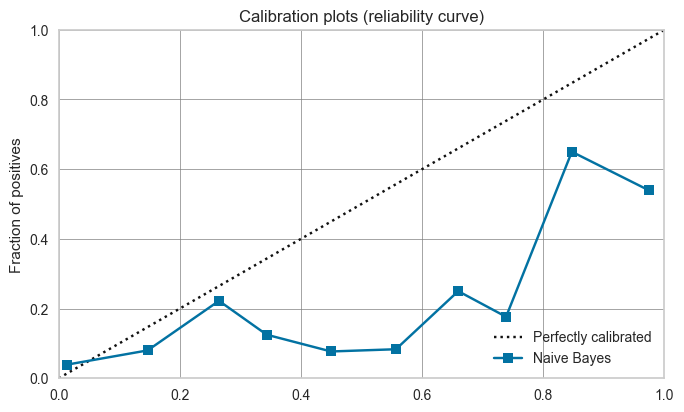

In [104]:
# before
exp5.plot_model(final_model, plot='calibration')

* Optimism in Predictions: The Naive Bayes model tends to overestimate the probability of positive outcomes, especially in the 0.4 to 0.6 probability range.
* Better Calibration at Extremes: The model performs better at the lower (0.0 to 0.2) and higher (0.8 to 1.0) ends of the probability spectrum, where it is closer to being well-calibrated or even slightly pessimistic.
* Room for Improvement: Calibration can be improved in the middle probability ranges (0.4 to 0.6) to ensure that predicted probabilities better reflect the actual outcomes.

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:03:17
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.8640,0.7962,0.3529,0.6486,0.4571,0.3870,0.4105,0.3883
1,0.8807,0.8218,0.3971,0.7500,0.5192,0.4584,0.4887,0.4383
2,0.8565,0.8198,0.3582,0.5854,0.4444,0.3675,0.3821,0.3883
3,0.8517,0.8362,0.2537,0.5862,0.3542,0.2849,0.3170,0.2862
4,0.8373,0.7923,0.3382,0.5000,0.4035,0.3134,0.3214,0.3616
Mean,0.8580,0.8132,0.3400,0.6140,0.4357,0.3622,0.3839,0.3726
Std,0.0143,0.0166,0.0473,0.0828,0.0551,0.0604,0.0634,0.0498


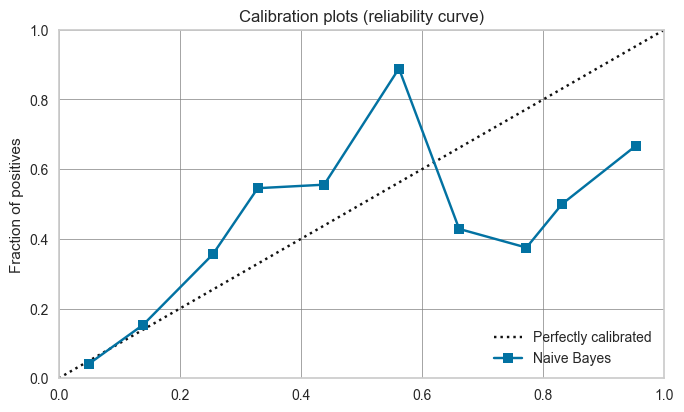

In [105]:
# After

# Calibration probability
calibrated_model = exp5.calibrate_model(estimator=nb_tuned5, method='isotonic')

# Calibration Plot
exp5.plot_model(calibrated_model, plot='calibration')

* In the probability prediction range of 0.5 to 0.6, the model appears overly optimistic because the predicted probability is higher than the actual fraction of positive observations.
* Conversely, in the prediction probability range of about 0.2 to 0.4 and 0.8 to 1.0, the model seems better calibrated or even slightly pessimistic.

**Check Overfitting or Underfitting**

In [106]:
# Making F2 Score

ftwo_scorer = make_scorer(fbeta_score, beta=2)
ftwo_scorer

make_scorer(fbeta_score, beta=2)

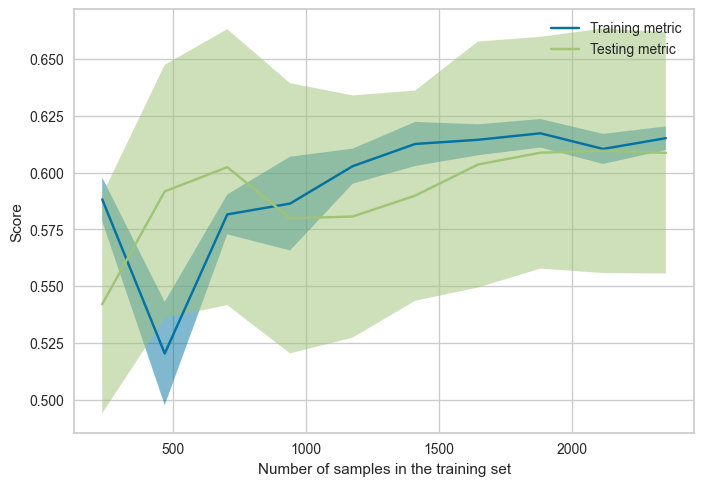

In [107]:
X = exp5.get_config("X_transformed")
y = exp5.get_config("y_transformed")

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "score_type": "both",
    "cv": 10,
    "scoring": ftwo_scorer,
}

LearningCurveDisplay.from_estimator(nb_tuned5, **common_params)

* Initial Overfitting: The model overfits when the training set is small, as indicated by the high training metric and low testing metric.
* Improvement with More Data: Increasing the number of training samples improves the model's generalization, as shown by the rising testing metric and decreasing training metric.
* Stabilization: Eventually, the training and testing metrics converge and stabilize, indicating the model has reached its optimal performance given the data.
* Consistent Performance: With more data, the variability in the testing metric decreases, suggesting the model's performance becomes more reliable and consistent.

**Check Precision-Recall Curve**

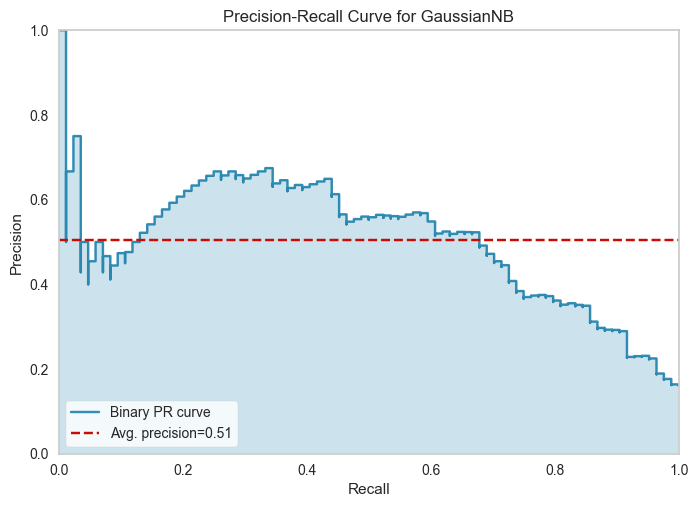

In [108]:
exp5.plot_model(nb_tuned5, plot='pr')

The precision-recall curve for the Gaussian Naive Bayes classifier indicates that the model has a moderate ability to balance precision and recall, with an average precision score of 0.51. The model shows variability in performance across different thresholds, and there are clear trade-offs between precision and recall. This analysis helps in understanding how well the model will perform in different scenarios and can guide further tuning and optimization efforts.

**Check ROC Curve**

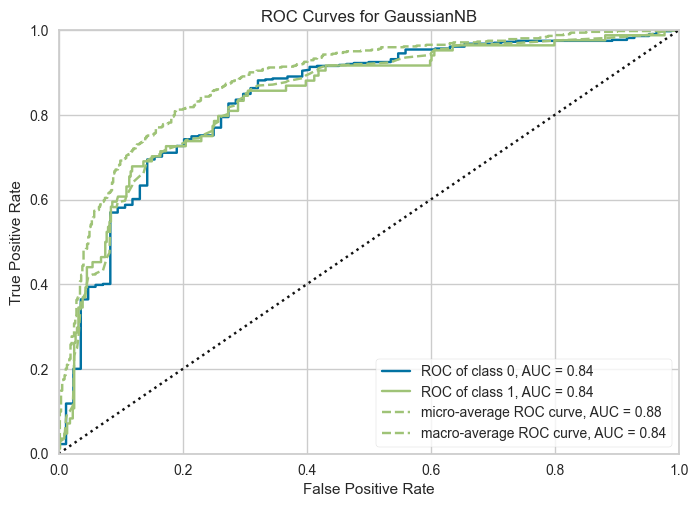

In [109]:
exp5.plot_model(nb_tuned5, plot = 'auc')

* True Positive Rate vs. False Positive Rate: The ROC curve shows the trade-off between TPR and FPR. The closer the curve is to the top-left corner, the better the model's performance.
* AUC Values: An AUC of 0.84 for both class 0 and class 1 indicates that the model has a good ability to distinguish between positive and negative classes.
* Micro vs. Macro Average: The AUC for the micro-average is 0.88, while the macro-average is 0.84. This suggests that the model performs slightly better when considering the proportion of instances in each class.

**Interpretasi Model**

Bagaimana cara kerja Naive Bayes?

Naive Bayes adalah algoritma machine learning yang sederhana namun efektif, sering digunakan untuk klasifikasi. Algoritma ini didasarkan pada Teorema Bayes dengan asumsi independensi yang kuat (naif) antara fitur-fitur.

$$
P(C|X) = \frac{P(X|C) \times P(C)}{P(X)}
$$

dimana:
* $P(C|X)$ adalah probabilitas posterior kelas C diberikan fitur X.
* $P(X|C)$ adalah probabilitas likelihood fitur X diberikan kelas C.
* $P(C)$ adalah probabilitas prior dari kelas C.
* $P(X)$ adalah probabilitas total dari fitur X.

Pengaplikasiannya:

Berdasarkan dataset untuk mengklasifikasikan apakah sebuah E-commerce terdapat customer "Churn" atau "not Churn" berdasarkan fitur Cashback Amount.

Training:

Dari dataset, hitung probabilitas awal (prior probability) dari setiap kelas (Churn atau not Churn).
$$
P(Churn=yes) = \frac{Jumlah customer Churn}{Total Pelanggan}
$$

$$
P(Churn=no) = \frac{Jumlah customer tidak Churn}{Total Pelanggan}
$$
​	
Untuk setiap fitur, hitung likelihood $P(Fi∣C)$ yaitu probabilitas fitur $Fi$ diberikan kelas $C$.

Contoh: Jika kita menggunakan Cashback Amount sebagai fitur:

$$
P(CashbackAmount| Churn=yes) dan 
P(CashbackAmount| Churn=no)$$

Testing:

Untuk customer Churn atau tidak yang mengandung kata "Cashback", hitung probabilitas Churn dan not Churn dengan Posterior Probability:
$$
P(Churn=yes) | F1, F2, ...,Fn
$$
$$
P(Churn=no) | F1, F2, ...,Fn
$$

Serta membuat prediksi:
* Jika $P(Churn=yes) > P(Churn=no)$, maka prediksi customer akan Churn. 
* Jika sebaliknya, prediksi customer tidak akan churn.

Pilih kelas dengan probabilitas tertinggi sebagai hasil klasifikasi.

Keuntungan:

* Mudah diimplementasikan.
* Efisien dalam hal waktu dan memori.
* Cukup efektif pada dataset dengan fitur independen.

Keterbatasan:

* Asumsi independensi yang kuat jarang benar dalam kenyataan, yang dapat mengurangi akurasi.
* Kurang fleksibel dibandingkan algoritma lain yang tidak mengasumsikan independensi fitur. 

**Predict Data Unseen**

In [110]:
model_unseen=exp5.predict_model(final_model,data=df_unseen)
model_unseen

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,prediction_label,prediction_score
3685,3.0,24.0,5,Fashion,5,Single,3,0,10.0,204.880005,0,1,0.7630
136,1.0,32.0,5,Mobile Phone,4,Single,6,1,3.0,148.130005,1,1,0.9972
418,1.0,29.0,4,Mobile Phone,3,Divorced,6,1,2.0,146.320007,1,1,0.9836
206,2.0,10.0,4,Mobile Phone,4,Married,3,0,1.0,153.559998,0,1,0.9589
3477,11.0,6.0,2,Laptop & Accessory,2,Single,1,0,8.0,176.250000,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,1.0,11.0,4,Fashion,5,Single,2,1,NaN,220.820007,1,1,0.8241
3750,7.0,32.0,5,Laptop & Accessory,4,Single,3,0,3.0,168.199997,0,0,0.7814
851,1.0,27.0,4,Laptop & Accessory,3,Single,3,0,NaN,224.809998,0,0,0.6165
484,4.0,11.0,3,Laptop & Accessory,3,Married,2,0,2.0,183.460007,0,0,0.9321


In [111]:
df_unseen['Churn'].value_counts()

0    543
1    111
Name: Churn, dtype: int64

**Confusion Matrix**

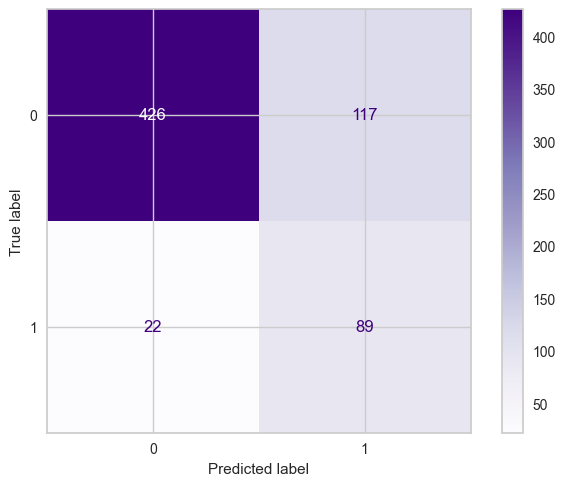

In [112]:
cm = confusion_matrix(model_unseen['Churn'],model_unseen['prediction_label'])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Purples)

**Model Simulation from Confusion Matrix**

- TP (True Positive): 89 (predicted that the customer will churn, and actually churned)
- TN (True Negative): 426 (predicted not to churn, and actually did not churn)
- FP (False Positive): 117 (predicted that the customer will churn, but actually did not churn)
- FN (False Negative): 22 (predicted that the customer will not churn, but actually churned)

**FP cost**: I assumed the person would churn, which would make the company offer promotions or attractive offers to prevent the customer from churning, but in reality, they did not churn. So, we spend money on promotion costs.

**FN cost**: I assumed the person would not churn, which means the company would not offer promotions or attractive offers to this person, but in reality, the customer churned, resulting in the company losing money.

**Feature Importance**

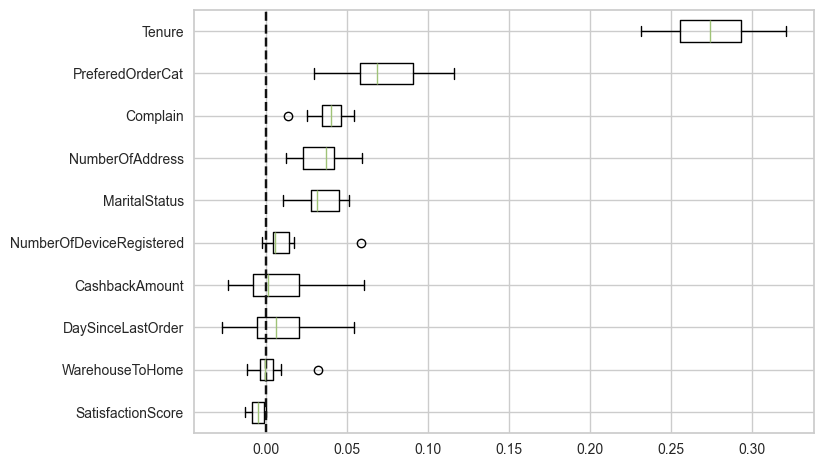

In [113]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)
    
X_test = exp5.get_config("X_test")
y_test = exp5.get_config("y_test")

result = permutation_importance(final_model, X_test, y_test, n_repeats=10, random_state=42, scoring=ftwo_scorer)
perm_sorted_idx = result.importances_mean.argsort()

# Build boxplot
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False,
    labels=X_test.columns[perm_sorted_idx],
)
# Add Vertical Line
plt.axvline(x=0, color="k", linestyle="--")
plt.show()

**Interpretation of Each Feature**:
   - **Tenure**: This feature has a high importance score, with a median of around 0.29 and ranging from 0.25 to 0.31. This indicates that tenure is a very important feature in the model.
   - **PreferredOrderCat**: This feature is also important, with a median of around 0.07, but with more variation in the importance score compared to Tenure.
   - **NumberOfAddress**: This feature has a median importance of around 0.05 with little variation.
   - **Complain**: This feature has a median importance of around 0.04, indicating a moderate contribution.
   - **MaritalStatus**: This feature has a lower median, around 0.03.
   - **DaySinceLastOrder, NumberOfDeviceRegistered, WarehouseToHome, CashbackAmount, SatisfactionScore**: All these features have low median importance scores, around 0.02 or less, with some variation in the distribution of values.

Overall, this chart shows that the "Tenure" feature is the most important in the model, followed by "PreferredOrderCat" and "NumberOfAddress". Other features have lower importance scores, indicating that they contribute less to the model's performance. Such analysis helps in understanding which features are the most influential in predictions and can be used for feature selection or further model interpretation.

In [139]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


**Counterfactuals**

In [141]:
continuous_features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount']
# prepare the data
df_train = exp5.get_config('X_train').dropna()
df_train['Churn'] = exp5.get_config('y_train').dropna()
data_dice = dice_ml.Data(dataframe=df_train, continuous_features=continuous_features, outcome_name='Churn')
data_dice

# model
rf_dice = dice_ml.Model(model=final_model, backend="sklearn")

# explainer
explainer = dice_ml.Dice(data_dice, rf_dice, method="kdtree")

In [142]:
# Generate CF based on the blackbox model
cf = explainer.generate_counterfactuals(X_test[1:2], total_CFs=3, desired_class="opposite")

# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:29<00:00, 29.80s/it]

Query instance (original outcome : 0)


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,1.0,35.0,5,Laptop & Accessory,4,Married,2,0,7.0,165.490005,0



Diverse Counterfactual set (new outcome: 1)


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2783,-,-,3,-,-,-,-,-,4.0,-,1
3699,-,-,-,Mobile Phone,-,Single,-,-,5.0,159.7899932861328,1
3108,-,31.0,-,-,-,Single,-,1,11.0,170.99000549316406,1


The counterfactual instances suggest that certain changes in features like "PreferredOrderCat", "MaritalStatus", "DaySinceLastOrder", and "CashbackAmount" can lead to a change in the churn outcome for the customer. This analysis helps in understanding what factors might influence a customer's decision to churn and can be used to develop strategies to retain customers by addressing these factors.

So, what's the correlation beetween feature importance with Tenure as the most important in the model?

In the given counterfactual instances, although "Tenure" is important in the overall model, other features such as "PreferredOrderCat", "MaritalStatus", "DaySinceLastOrder", and "CashbackAmount" are more influential in determining churn. This indicates that for some customers, churn prevention actions might be more effective if focused on changes in these features rather than solely on the duration of the customer's subscription.

____


### `Conclusion and Recommendation`

**Conclusion**:

Based on the classification report results from the model, we can conclude that if this model is later used to predict whether customers will churn or not, the Naive Bayes model's F2 score accuracy is 0.5978 before hyperparameter tuning. After hyperparameter tuning, the result improves to 0.6092. For inaccurate results, we emphasize False Negatives because they are more detrimental than False Positives.

After the modeling process, this model applies within a certain interval with the following details:
* **Tenure** < 34.5
* **WarehouseToHome** < 36.5
* **NumberDeviceOfRegistered** >1.5 & <5.5
* **NumberOfAddress** <12
* **DaySinceLastOrder** < 14.5
* **CashBackAmount** >69.04 & <274

Churn statistics using df_unseen (20%): 
- 0: 543
- 1: 111
- **Total data**: 654

<u>**Without the model:**</u>

Without the model, it is difficult to know which customers will churn or not. Thus, the calculation is:
- Total customers: 654
- Acquisition cost to replace churned customers:
    **654 * 500 USD = 327000 USD**
- Total Cost: 327000 USD
- Amount saved: 0 USD

This means the potential acquisition costs incurred become much higher.
<br><br>

<u>**With the model:**</u>

Total data: 654

Based on the confusion matrix:
- Cost for promotions: (117+89) * 100 USD = 20600 USD
- Acquisition cost to replace churned customers: 22 * 500 USD = 11000 USD
- Total Cost: 20600 USD + 11000 USD = **31600 USD**
- Amount saved: **327000 USD - 31600 USD =  295400 USD**

Based on the above calculations, using the created machine learning model, the company can save significantly on costs. It is better to spend on retention costs rather than risking losing customers (churn).

After creating a machine learning model to predict customer churn, the model can be implemented in the business process of the e-commerce company weekly. The model will be used to identify customers likely to churn, allowing the company to take action (e.g., offering cashback, giving discount promos, etc.) to retain them.

**Recommendation**:

- For Modeling:
  - During data extraction, ensure the data includes a customer ID column to avoid duplicate entries and verify that there are no missing values.
  - Add new features/columns that are related to the potential for customers to churn.
  - Perform cohort analysis to observe churn based on customer access periods/transaction periods.
  - Increase the sample size in the dataset to provide the model with more references, which can improve prediction accuracy.
  - Experiment with different machine learning algorithms and conduct hyperparameter tuning.
  - Select features according to their importance and try combinations of impactful features to reduce model complexity.
<br><br>
- For Business:
  - Create more segmented marketing campaigns, especially for customers with higher churn characteristics, such as single status customers.
  - Review the UI/UX of the e-commerce application on both computers and mobile devices to enhance the customer shopping experience.
  - Offer more promotions and excellent customer support initially to new customers to increase their retention period with the e-commerce service.
  - Consider providing more cashback, particularly to mobile phone buyers, to reduce churn rates.
  - Offer shipping cost discounts to potential churn customers who have a long distance between the warehouse and their home.
  - Pay attention to customer complaints regarding the ease of using the e-commerce platform, increase product variety by seeking new partners, optimize live chat between customers-buyers and customers-support centers, monitor and train registered marketplaces to ensure satisfactory service and products. 

Implementing these recommendations can help refine your model and business strategies to achieve better customer retention and satisfaction.

___
### `Deployment`

In [116]:
# save to csv format

df_seen.to_csv('data_seen.csv')
df_unseen.to_csv('data_unseen.csv')

In [168]:
save_model(final_model,'saved_nb_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/bv/1m6kfd1x5h1919q52y6mzss40000gn/T/joblib),
          steps=[('imputation',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=TransformerWrapper(exclude=None,
                                                                    include=['Tenure',
                                                                             'WarehouseToHome',
                                                                             'DaySinceLastOrder'],
                                                                    transformer=SimpleImputer(add_indicator=False,
                                                                                              copy=True,
                                                                                              fill_value=None,
                                                                                              keep_empty_feature.

In [129]:
saved_nb = load_model('saved_nb_model')

Transformation Pipeline and Model Successfully Loaded
